# Study of clustering methods in market basket analysis

#### Ivan Churilov

In [301]:
import pandas as pd
import plotly
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

## Table analysis

In [303]:
# for csv file opening, use chunks. 
chunksize = 10**6
chunk_list = []
for chunk in pd.read_csv(r'C:\Users\79032\Desktop\yearProject\!01_02-18_VSE.csv', chunksize=chunksize, encoding='windows-1251', on_bad_lines='skip', sep = ';'):
    chunk_list.append(chunk)
df_original = pd.concat(chunk_list, ignore_index=True)

print(df_original.info()) 
df_original.head()

C:\Users\79032\AppData\Local\Temp\ipykernel_2224\2756323583.py:4: DtypeWarning: Columns (9,10,11,14,16,20,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(r'C:\Users\79032\Desktop\yearProject\!01_02-18_VSE.csv', chunksize=chunksize, encoding='windows-1251', on_bad_lines='skip', sep = ';'):


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693710 entries, 0 to 693709
Data columns (total 39 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Дата                      693710 non-null  object
 1   ДатаДоставки              693070 non-null  object
 2   НомерЗаказаНаСайте        693710 non-null  object
 3   НовыйСтатус               693710 non-null  object
 4   СуммаЗаказаНаСайте        693710 non-null  object
 5   СуммаДокумента            693710 non-null  object
 6   МетодДоставки             693634 non-null  object
 7   ФормаОплаты               693631 non-null  object
 8   Регион                    689119 non-null  object
 9   Группа2                   572350 non-null  object
 10  Группа3                   572350 non-null  object
 11  Группа4                   552282 non-null  object
 12  Тип                       693710 non-null  object
 13  Номенклатура              693710 non-null  object
 14  ТипТ

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,...,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа,НеделяЗаказа
0,01.02.2018 10:38,10.02.2018 0:00,7291373_TR,Возврат из ПВЗ,7 014,7 014,Магазины,Безналичная,Коломна (Московская область район),NaN,...,1,1,01.02.2018 0:00,55575653-55555051535479,guest_103117_gu28@workmail.ru,Гость,ID10022107250,0,NaN,5
1,01.02.2018 12:32,03.02.2018 0:00,7292459_TR,Доставлен,906,906,Магазины,Безналичная,Москва,NaN,...,1,1,01.02.2018 0:00,55574954-53575755575772,guest_103117_gu28@workmail.ru,Гость,ID10022107250,0,NaN,5
2,07.02.2018 16:16,09.02.2018 0:00,7356567_TR,Возврат из ПВЗ,858,858,Магазины,Безналичная,Люберцы (Люберецкий район),ИГРУШКИ,...,1,0,07.02.2018 0:00,55575054-55535354545172,108117_lu21@yandex.ru,Елена,ID000sn-9504351,0,NaN,6
3,02.02.2018 20:27,15.02.2018 0:00,7305890_TR,Доставлен,3 598,3 598,Магазины,Безналичная,Волгоград,NaN,...,1,1,02.02.2018 0:00,55574852-52515654505079,101109_em20@gmail.com,Гость,ID10022107250,0,NaN,5
4,06.02.2018 12:34,12.02.2018 0:00,7341741_TR,К отгрузке,6 148,6 148,Курьерская,Наличная,Мытищи (Мытищинский район),ИГРУШКИ,...,12,1,06.02.2018 0:00,55574954-55495350495278,108117_lu16@mail.ru,Людмила,ID9010000097654,0,NaN,6


In [304]:
# copying initial dataset 
df=df_original

In [305]:
df.shape

(693710, 39)

In [306]:
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data = []
for column in df:
    data.append([column] + columnValues(df[column]))

print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column                   |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|--------------------------+----------------+---------------+--------------+-------------+-------------|
| Дата                     |          40462 |             0 |            0 |         0   | object      |
| ДатаДоставки             |             92 |             0 |          640 |         0.1 | object      |
| НомерЗаказаНаСайте       |         178105 |             0 |            0 |         0   | object      |
| НовыйСтатус              |             20 |             0 |            0 |         0   | object      |
| СуммаЗаказаНаСайте       |          15017 |             0 |            0 |         0   | object      |
| СуммаДокумента           |          14179 |             0 |            0 |         0   | object      |
| МетодДоставки            |              8 |             0 |           76 |         0   | object      |
| ФормаОплаты              |              3 |          

In [307]:
# for client ID phone numebr is enough
df = df.drop(columns=['ЭлектроннаяПочта_new'])

In [308]:
df.shape

(693710, 38)

In [309]:
# dropping '0' phone numbers
df = df.loc[df['Телефон_new'] != "0"]

In [310]:
df.shape

(692512, 38)

In [311]:
# dropping all the unnecessary columns, which provide no
df = df.drop(columns=['ПВЗ_код', 'Клиент', 'ID_SKU', 'ГородМагазина', 'ГодДатыЗаказа', 'ДатаДоставки', 
                      'МетодДоставки', 'МесяцДатыЗаказа', 'МагазинЗаказа',])

In [312]:
df.shape

(692512, 29)

In [313]:
df.ПричинаОтмены.unique()

array([nan, 'Возврат товара', 'Авто корректировка склада',
       '4.02 Нет основных позиций заказа',
       '1.4 Ошибка выбора, будет новый заказ', '5.3 Другое',
       '1.5 Письмо об отмене', '1.1 Тест, контрольная закупка',
       '5.1 Уже купил товар в другом месте',
       '4.04 Не пришел товар от поставщика',
       '1.3 Не верные контактные данные или нет связи с клиентом',
       '2.1 Не устроила дата доставки',
       '4.01 Нет на остатках или нет в обработке ЗПЗ',
       '5.2 Истек срок хранения товара при самовывоз',
       '3.3 Несоотв. стоимости товара или цена не устроила',
       '2.4 Нет доставки в данный город (регион)',
       '2.2 Не устроило время (часы) доставки', '1.0 Форсмажор',
       '1.2 Повторный заказ (дубль заказа)',
       '3.5 Будет новый заказ после получения бонусной карты',
       'Авто корректировка ЗПЗ', '2.3 Не устроила стоимость доставки',
       '3.4 Не устроило отсутствие бонусов или скидок',
       '4.03 Нет нужной ассортиментной позиции (цвет, 

In [314]:
# remove all mistakes from cancel reason
df = df.loc[~df['ПричинаОтмены'].isin(['4.07 Ошибка интеграции DPD', '4.07 Ошибка интеграции DPD', '1.2 Повторный заказ (дубль заказа)',
                  '1.0 Форсмажор', '1.1 Тест, контрольная закупка', '1.4 Ошибка выбора, будет новый заказ' ])]

In [315]:
df.shape

(686663, 29)

In [316]:
df.НовыйСтатус.unique()

array(['Возврат из ПВЗ', 'Доставлен', 'К отгрузке', 'В резерве',
       'Отменен', 'Принят в ПВЗ', 'Расформирован ПВЗ', 'Получен в ПВЗ',
       'Частичный возврат', 'Отменяется', 'Не обеспечен',
       'Скомплектован Регион', 'Возврат', 'Отправлен в ПВЗ',
       'Передан в Регион', 'Оформлен у поставщика', 'Загружен',
       'Подтвержден у поставщика', 'Заказано в РЦ', 'В работе КЦ'],
      dtype=object)

In [317]:
# dropping all other types of goods, like delivery 
df = df.loc[df['Тип'] != "ИНОЕ"]

In [318]:
df.shape

(552918, 29)

#### Now widening up regions in the dataset

In [320]:
df['Регион'] = df['Регион'].replace(['Королев','Черноголовка (Ногинский район)', 'Молоково (Ленинский район)',
       'Долгопрудный (Московская область район)', 'Долгопрудный','Москва','Одинцово (Одинцовский район)', 'Белгород', 'Владимир', 'Воронеж', 'Иваново', 'Калуга', 'Кострома', 'Курск', 'Липецк', 'Люберцы', 'Мытищи', 
                                     'Подольск', 'Рязань', 'Сергиев Посад', 'Серпухов', 'Смоленск', 'Тамбов', 'Тверь', 'Тула', 'Ярославль', "Люберцы (Люберецкий район)", "Мытищи (Мытищинский район)", "Реутов (Московская область район)", "Сергиев Посад (Сергиево-Посадский район)", "Красногорск (Красногорский район)", "Балашиха (Балашихинский район)", "Жуковский (Московская область район)", "Щелково (Щелковский район)", "Подольск (Московская область район)", "Раменское (Раменский район)", "Королев (Московская область район)", "Томилино (Люберецкий район)", "Павловский Посад (Павлово-Посадский район)", "Ногинск (Ногинский район)", "Видное (Ленинский район)", "Железнодорожный (Московская область район)", "Котельники (Люберецкий район)", "Дубна (Московская область район)", "Внуково (Волоколамский район)", "Щербинка (Московская область район)", "Электросталь (Московская область район)", "Химки (Московская область район)", "Коломна (Московская область район)", "Климовск (Московская область район)", "Новомосковск", "Орехово-Зуево (Московская область район)", "Развилка (Ленинский район)", "Домодедово (Домодедовский район)", "Малаховка (Люберецкий район)", "Дедовск (Истринский район)", "Булатниково (Ленинский район)", "Путилково (Красногорский район)", "Старая Купавна (Ногинский район)", "Клин (Клинский район)", "Дзержинский (Московская область район)", "Немчиновка (Одинцовский район)", "Истра (Истринский район)", "Сабурово (Красногорский район)", "Никольско-Архангельский (Балашихинский район)", "Заречье (Одинцовский район)", "Пущино (Московская область район)", "Зеленоград", "Усть-Илимск", "Нахабино (Красногорский район)", "Никольско-Архангельский (Балашихинский район)", "Заря (Балашихинский район)", "ВНИИССОК (Одинцовский район)", "Дмитров (Дмитровский район)", "Мытищи 16 (Мытищинский район)", "Фрязино (Московская область район)", "Звенигород (Московская область район)", "Волоколамск (Волоколамский район)", "Озеры (Озерский район)", "Кратово (Раменский район)", "Лыткарино (Московская область район)", "Воскресенск (Воскресенский район)", "Монино (Щелковский район)", "Переделкино (Ленинский район)", "Шатура (Шатурский район)", "Апрелевка (Наро-Фоминский район)", "Совхоз им Ленина (Ленинский район)", "Луховицы (Луховицкий район)", "Коммунарка", "Солнечногорск (Солнечногорский район)", "Юбилейный (Московская область район)", "Кашира (Каширский район)", "Рошаль (Московская область район)", "Чехов (Чеховский район)", "Обнинск", "Куровское (Орехово-Зуевский район)", "Голицыно (Одинцовский район)", "Электроугли (Ногинский район)", "Орехово-Зуево", "Электрогорск (Павлово-Посадский район)", "Можайск (Можайский район)", "Губаха", "Колонтаево (Ногинский район)", "Звенигород", "Бутово (Ленинский район)", "Коломна", "Раздоры (Одинцовский район)", "Троицк (ГП Москва)", "Шолохово (Мытищинский район)", "Бронницы (Московская область район)", "Черкизово (Пушкинский район)", "Михнево (Ступинский район)", "Бородки (Одинцовский район)", "Ангелово (Красногорский район)", "Салтыковка (Балашихинский район)", "Поварово (Солнечногорский район)", "Вешки (Мытищинский район)", "Горки-6 (Красногорский район)", "Долгое Ледово (Щелковский район)", "Петрово-Дальнее (Красногорский район)", "Русавкино-Романово (Балашихинский район)", "Щитниково (Балашихинский район)", "Беляниново (Мытищинский район)", "Зеленоградский (Пушкинский район)", "Тучково (Рузский район)", "Медвежьи Озера (Щелковский район)", "Ликино (Одинцовский район)", "Красноармейск (Московская область район)", "Воскресенское (Каширский район)", "Бисерово (Ногинский район)", "Кудиново (Ногинский район)", "Малые Вяземы (Одинцовский район)", "Подольниха (Мытищинский район)", "Марушкино (Наро-Фоминский район)", "Брянск", "Орёл", "Реутов", "Волжский", "Химки", "Щербинка", "Электросталь", "Жуковский", "Люберцы-2 (Люберецкий район)", "Заполярный", "Железнодорожный", "Ивантеевка (Московская область район)", "Ступино (Ступинский район)", "Углич", "Челюскинский (Пушкинский район)", "Некрасовский (Дмитровский район)", "Апатиты", "Красный Поселок (Истринский район)", "Ильинский (Раменский район)", "Переславль-Залесский", "Абинск", "Барвиха (Одинцовский район)", "Кстово", "Сосенки (Ленинский район)", "Загорянский (Щелковский район)", "Серпухов (Московская область район)", "Лобня (Московская область район)", "Правдинский (Пушкинский район)", "Удельная (Раменский район)", "Марусино (Люберецкий район)", "Красково (Люберецкий район)", "Тяжино (Раменский район)", "Жигулёвск", "Павловский посад", "Хотьково (Сергиево-Посадский район)", "Обухово (Ногинский район)", "Петелино (Одинцовский район)", "Первомайское (Наро-Фоминский район)", "Фрязево (Ногинский район)", "Егорьевск (Егорьевский район)", "Белая Калитва", "Островцы (Раменский район)", "Большие Вяземы (Одинцовский район)", "Одинцово-1 (Одинцовский район)", "Митино (Волоколамский район)", "Купавна (Талдомский район)", "Руза (Рузский район)", "Дрожжино (Ленинский район)", "Федорово (Демиховское с/п) (Орехово-Зуевский район)", "Софрино (Пушкинский район)", "Электроизолятор (Раменский район)", "Зарайск (Зарайский район)", "Наро-Фоминск (Наро-Фоминский район)", "Балобаново (Ногинский район)", "Рогово (Подольский район)", "Дубна", "Дроздово (Ленинский район)", "Ащерино (Ленинский район)", "Истра (Красногорский район)", "Солнечногорск-7 (Солнечногорский район)", "Орел", "Пуршево (Балашихинский район)", "Сапроново (Ленинский район)", "Котляково (Домодедовский район)", "Тарасовка (Пушкинский район)", "Протвино (Московская область район)", "Городец", "Климовск", "Брехово (Солнечногорский район)", "Ромашково (Одинцовский район)", "Вялки (Раменский район)", "Полтавская (Краснодарский край)", "Ликино-Дулево (Орехово-Зуевский район)", "Арзамас", "Биокомбината (Щелковский район)", "Виноградово (Воскресенский район)", "Гагарин", "Талдом (Талдомский район)", "Знамя Октября (Подольский район)", "Вишняковские Дачи (Ногинский район)", "Лесные Поляны (Пушкинский район)", "Новосельцево (Мытищинский район)", "Большие Дворы (Павлово-Посадский район)", "Большие Жеребцы (Щелковский район)", "Сатино-Русское (Подольский район)", "Икша (Дмитровский район)", "Брюховецкая (Краснодарский край)", "Новоглаголево (Наро-Фоминский район)", "Нефедьево (Красногорский район)", "Саларьево (Ленинский район)", "Горки Ленинские (Домодедовский район)", "Ерино (Подольский район)", "Глебовский (Истринский район)", "Володарского (Ленинский район)", "Птичное (Наро-Фоминский район)", "Одинцово-10 (Одинцовский район)", "Поведники (Мытищинский район)", "Тосно", "Александров", "Павловская Слобода (Истринский район)", "Верещагино", "Новодрожжино (Ленинский район)", "Софьино (Раменский район)", "Североморск", "Зюзино (Раменский район)", "Мотяково (Люберецкий район)", "Заволенье (Новинское с/п) (Орехово-Зуевский район)", "Крекшино (Наро-Фоминский район)", "Михнево (Домодедовский район)", "Воровского (Ногинский район)", "Боброво (Ленинский район)", "Федюково (Подольский район)", "Марфино (Мытищинский район)", "Дрезна (Орехово-Зуевский район)", "Жилино-1 (Люберецкий район)", "Балашов", "Вольск", "Ухта", "Молоденово (Одинцовский район)", "Трехгорка (Одинцовский район)", "Павлово (Нижегородская область)", "Гальчино (Домодедовский район)", "Димитровград", "Кунгур", "Сергиев Посад-7 (Сергиево-Посадский район)", "Покачи", "Дубровский (Ленинский район)", "Ступинский (Ступинский район)", "Новопокровская (Краснодарский край)", "Ногинск-5 (Ногинский район)", "Ногинск-9 (Ногинский район)", "свх Подольский Центральная усадьба (Подольский район)", "Красноармейск", "Борисоглебск", "СНТ Урожаи (Одинцовский район)", "Митино", "Яхрома (Дмитровский район)", "Бронницы", "Истомиха (Домодедовский район)", "Черная Грязь (Солнечногорский район)", "Ногово (Клинский район)", "Ашукино (Пушкинский район)", "Кронштадт", "Елизово", "Сатка", "Волжск", "Михалково (Красногорский район)", "Владычино (Солнечногорский район)", "Федурново (Балашихинский район)", "Альметьевск", "Белоозерский (Воскресенский район)", "Волгодонск", "Сергиевское (Коломенский район)", "Малоярославец", "Покров", "Белореченск"], 'Центральный ф.о.')

df['Регион'] = df['Регион'].replace(['Великий Новгород', 'Вологда', 'Воркута', 'Всеволожск', 'Выборг', 'Гатчина', 'Кингисепп', 'Кириши', 'Колпино', 'Мурманск', 
                                     'Петрозаводск', 'Псков', 'Пушкин', 'Санкт-Петербург', 'Тихвин', 'Череповец', "Архангельск", "Калининград", "Псков", "Великие Луки", "Санкт-Петербург", "Пушкино (Пушкинский район)", "Кубинка (Одинцовский район)", "Архангельское (Красногорский район)"], 'Северо-Западный ф.о.')

df['Регион'] = df['Регион'].replace(['Ижевск', 'Казань', 'Набережные Челны', 'Нижний Новгород', 'Новокуйбышевск', 'Пенза', 'Пермь', 'Самара', 'Саратов', 
                                     'Тольятти', 'Ульяновск', 'Уфа', 'Чебоксары', "Оренбург", "Пенза", "Самара", "Саратов", "Ульяновск", "Пермь", "Нижний Новгород", "Чебоксары", "Йошкар-Ола", "Ижевск", "Казань", "Уфа", "Орск", "Магнитогорск", "Березники", "Саранск", "Чайковский", "Камбарка", "Кумертау", "Стерлитамак", "Набережные Челны", "Алметьевск", "Нижнекамск", "Казань", "Уфа", "Чебоксары", "Йошкар-Ола", "Саранск", "Киров", "Сызрань", "Самара", "Саратов", "Сыктывкар", "Тольятти", "Тула", "Ульяновск", "Уфа", "Чебоксары", "Чистополь", "Чувашия", "Чулым", "Чусовой", "Шадринск", "Шарья", "Шатура", "Шахты", "Шахунья", "Щелково", "Энгельс", "Юрга", "Яранск", "Оренбург", "Самара", "Саратов", "Ульяновск", "Пермь", "Нижний Новгород", "Чебоксары", "Йошкар-Ола", "Ижевск", "Казань", "Уфа", "Орск", "Березники", "Саранск", "Чайковский", "Кумертау", "Стерлитамак", "Набережные Челны", "Алметьевск", "Нижнекамск", "Сыктывкар", "Павлово (Нижегородская область)", "Казань", "Уфа", "Чебоксары", "Йошкар-Ола", "Саранск", "Самара", "Саратов", "Тольятти", "Ульяновск", "Чистополь", "Чувашия", "Альметьевск", 'Балаково'], 'Приволжский ф.о.')

df['Регион'] = df['Регион'].replace(['Барнаул', 'Горно-Алтайск', 'Иркутск', 'Кемерово', 'Красноярск', 'Новокузнецк', 'Новосибирск', 'Омск', 'Томск', "Новосибирск", "Омск", "Кемерово", "Красноярск", "Иркутск", "Барнаул", "Томск", "Улан-Удэ", "Чита", "Горно-Алтайск", "Кызыл", "Абакан", "Ангарск", "Братск", "Шелехов", "Саяногорск", "Норильск", "Минусинск", "Сосновоборск", "Железногорск (Красноярский край)", "Лесосибирск", "Ачинск", "Зима", "Бирюсинск", "Канско-Сосновка", "Бодайбо", "Усть-Илимск", "Черемхово", "Усолье-Сибирское", "Змеиногорск", "Новокузнецк", "Междуреченск", "Прокопьевск", "Киселевск", "Юрга", "Курчатов", "Мариинск", "Яшкино", "Тайга", "Топки", "Таштагол", "Курган", "Куртамыш", "Катав-Ивановск", "Кыштым", "Чебаркуль", "Куртамыш", "Барнаул", "Бийск", "Благовещенск", "Братск", "Верхоянск", "Владивосток", "Волчанск", "Горняк", "Горный", "Горячий Ключ", "Дальнегорск", "Долинск", "Еруслан", "Железногорск", "Заринск", "Иваново", "Иркутск", "Камень-Рыболов", "Кемерово", "Киселёвск", "Ковылкино", "Колпашево", "Красноярск", "Кузнецк", "Кызыл", "Лесосибирск", "Магнитогорск", "Миасс", "Мирный", "Новокузнецк", "Новосибирск", "Норильск", "Омск", "Осинники", "Островное", "Охотск", "Питкяранта", "Родники", "Рубцовск", "Северобайкальск", "Сосновка", "Сыроделово", "Тайшет", "Томск", "Тура", "Туруханск", "Тында", "Тюмень", "Улан-Удэ", "Усть-Кут", "Усть-Ордынский", "Усть-Среднеканск", "Усть-Янск", "Хандыга", "Черемхово", "Чернышевск", "Чита", "Шелехов", "Шерегеш", "Энергетик", "Юрга", "Якутск", "Новосибирск", "Омск", "Кемерово", "Красноярск", "Иркутск", "Барнаул", "Томск", "Улан-Удэ", "Чита", "Горно-Алтайск", "Кызыл", "Абакан", "Ангарск", "Братск", "Шелехов", "Саяногорск", "Норильск", "Минусинск", "Сосновоборск", "Железногорск (Красноярский край)", "Лесосибирск", "Ачинск", "Зима", "Бирюсинск", "Канско-Сосновка", "Бодайбо", "Усть-Илимск", "Черемхово", "Усолье-Сибирское", "Змеиногорск", "Новокузнецк", "Междуреченск", "Прокопьевск", "Киселевск", "Юрга", "Курчатов", "Мариинск", "Яшкино", "Тайга", "Топки", "Таштагол", "Курган", "Куртамыш", "Катав-Ивановск", "Кыштым", "Чебаркуль", "Куртамыш", "Барнаул", "Бийск", "Благовещенск", "Братск", "Верхоянск", "Владивосток", "Волчанск", "Горняк", "Горный", "Горячий Ключ", "Дальнегорск", "Долинск", "Еруслан", "Железногорск", "Заринск", "Иваново", "Иркутск", "Камень-Рыболов", "Кемерово", "Киселёвск", "Ковылкино", "Колпашево", "Красноярск", "Кузнецк", "Кызыл", "Лесосибирск", "Магнитогорск", "Миасс", "Мирный", "Новокузнецк", "Новосибирск", "Норильск", "Омск", "Осинники", "Островное", "Охотск", "Питкяранта", "Родники", "Рубцовск", "Северобайкальск", "Сосновка", "Сыроделово", "Тайшет", "Томск", "Тура", "Туруханск", "Тында", "Тюмень", "Улан-Удэ", "Усть-Кут", "Усть-Ордынский", "Усть-Среднеканск", "Усть-Янск", "Хандыга", "Черемхово", "Чернышевск", "Чита", "Шелехов", "Шерегеш", "Энергетик", "Юрга", "Якутск"], 'Сибирский ф.о.')

df['Регион'] = df['Регион'].replace(['Волгоград', 'Краснодар', 'Новочеркасск', 'Пятигорск', 'Ростов-на-Дону', 'Сочи', 'Ставрополь', "Таганрог", "Астрахань", "Волгоград", "Ростов-на-Дону", "Новороссийск", "Новочеркасск", "Новошахтинск", "Ейск", "Крымск", "Краснодар", "Ставрополь", "Минеральные Воды", "Пятигорск", "Кисловодск", "Симферополь", "Севастополь", "Махачкала", "Грозный", "Буйнакск", "Каспийск", "Нальчик", "Черкесск", "Владикавказ", "Элиста", "Азов", "Батайск", "Бердск", "Белово", "Белоярский (ХМАО)", "Березники", "Благовещенск", "Будённовск", "Геленджик", "Гуково", "Гулькевичи", "Гурьевск (Кемеровская область)", "Донецк", "Ейск", "Железногорск", "Заречный (Свердловская область)", "Зима", "Ивантеевка", "Ипатово", "Кандалакша", "Каменск-Уральский", "Камышин", "Киселёвск", "Ковров", "Ковдор", "Колпашево", "Комсомольск-на-Амуре", "Кореновск", "Котлас", "Красная Пахра (Подольский район)", "Краснокаменск", "Краснотурьинск", "Кумертау", "Курган", "Курчатов", "Кызыл", "Лабинск", "Ленинск-Кузнецкий", "Лесной", "Лиски", "Магадан", "Майкоп", "Михнево", "Михалково", "Мончегорск", "Мурманск", "Муром", "Невинномысск", "Невьянск", "Нефтекамск", "Нефтеюганск", "Нижневартовск", "Нижний Тагил", "Новокузнецк", "Новокубанск", "Новоуральск", "Новочебоксарск", "Новый Уренгой", "Ноябрьск", "Ноябрьск", "Облучье", "Октябрьский", "Оленегорск", "Орск", "Оса", "Отрадный", "Павловск (Воронежская обл.)", "Пенза", "Первоуральск", "Пермь", "Петровск", "Приморск", "Прокопьевск", "Пугачёв", "Радужный (ХМАО)", "Рассказово", "Ревда", "Россошь", "Рубцовск", "Рыбинск", "Салават", "Салехард", "Сафоново", "Светлоград", "Северск", "Серпухов", "Славянск-на-Кубани", "Снежногорск", "Советск", "Соликамск", "Сосновый Бор", "Ставрополь", "Старый Оскол", "Стерлитамак", "Стрежевой", "Сургут", "Сызрань", "Сыктывкар", "Таганрог", "Тамбов", "Темрюк", "Тимашёвск", "Тихвин", "Тобольск", "Тольятти", "Томск", "Троицк (Челябинская обл.)", "Туапсе", "Туймазы", "Тюмень", "Улан-Удэ", "Уссурийск", "Усть-Илимск", "Усть-Лабинск", "Фрязино", "Ханты-Мансийск", "Чайковский", "Чапаевск", "Череповец", "Черкесск", "Черняховск", "Чистополь", "Чита", "Чусовой", "Шахты", "Элиста", "Энгельс", "Юрга", "Южно-Сахалинск", "Якутск", "Ялта", "Ярославль", "Таганрог", "Астрахань", "Волгоград", "Ростов-на-Дону", "Новороссийск", "Новочеркасск", "Новошахтинск", "Ейск", "Крымск", "Краснодар", "Ставрополь", "Минеральные Воды", "Пятигорск", "Кисловодск", "Симферополь", "Севастополь", "Махачкала", "Грозный", "Буйнакск", "Каспийск", "Нальчик", "Черкесск", "Владикавказ", "Элиста", "Туапсе", "Майкоп", "Темрюк", "Новороссийск", "Ейск", "Азов", "Будённовск", "Краснодарский край", "Новопокровская (Краснодарский край)", "Брюховецкая (Краснодарский край)", 'Анапа', 'Адлер'], 'Южный ф.о.')

df['Регион'] = df['Регион'].replace(['Екатеринбург', 'Нижневартовск', 'Нижний Тагил', 'Ноябрьск', 'Сургут', 'Тюмень', 'Челябинск', "Екатеринбург", "Челябинск", "Тюмень", "Ханты-Мансийск", "Нижневартовск", "Сургут", "Ноябрьск", "Магнитогорск", "Курган", "Каменск-Уральский", "Заречный (Свердловская область)", "Первоуральск", "Краснотурьинск", "Полевской", "Верхняя Пышма", "Кушва", "Новоуральск", "Ревда", "Асбест", "Радужный (ХМАО)", "Нефтеюганск", "Снежногорск", "Саров", "Краснокаменск", "Краснотурьинск", "Курган", "Куртамыш", "Катав-Ивановск", "Миасс", "Златоуст", "Кыштым", "Чебаркуль", "Троицк (Челябинская обл.)", "Краснокамск", "Берёзовский", "Среднеуральск", "Алапаевск", "Невьянск", "Богданович", "Краснотурьинск", "Артёмовский", "Туринск", "Ирбит", "Камышлов", "Тавда", "ЗАТО Свободный (Свердловская область)", "Белоярский (ХМАО)", "Лесной", "Сосьва", "Берёзовский", "Сухой Лог", "Красноуфимск", "Ачит", "Нижняя Тура", "Красноуральск", "Арамиль", "Верхняя Пышма", "Полевской", "Ревда", "Асбест", "Кушва", "Камышлов", "Тавда", "Богданович", "Артёмовский", "Туринск", "Ирбит", "Кыштым", "Чебаркуль", "Катав-Ивановск", "Куртамыш", "Краснокамск", "Среднеуральск", "Новоуральск", "Лесной", "Сухой Лог", "Красноуфимск", "Ачит", "Нижняя Тура", "Красноуральск", "Арамиль", "Екатеринбург", "Челябинск", "Тюмень", "Ханты-Мансийск", "Нижневартовск", "Сургут", "Ноябрьск", "Магнитогорск", "Курган", "Каменск-Уральский", "Заречный (Свердловская область)", "Первоуральск", "Краснотурьинск", "Полевской", "Верхняя Пышма", "Кушва", "Новоуральск", "Ревда", "Асбест", "Радужный (ХМАО)", "Нефтеюганск", "Снежногорск", "Саров", "Краснокаменск", "Краснотурьинск", "Курган", "Куртамыш", "Катав-Ивановск", "Миасс", "Златоуст", "Кыштым", "Чебаркуль", "Троицк (Челябинская обл.)", "Краснокамск", "Берёзовский", "Среднеуральск", "Алапаевск", "Невьянск", "Богданович", "Краснотурьинск", "Артёмовский", "Туринск", "Ирбит", "Камышлов", "Тавда", "ЗАТО Свободный (Свердловская область)", "Белоярский (ХМАО)", "Лесной", "Сосьва", "Берёзовский", "Сухой Лог", "Красноуфимск", "Ачит", "Нижняя Тура", "Красноуральск", "Арамиль"], 'Уральский ф.о.')

df['Регион'] = df['Регион'].replace(["Хабаровск"], "Дальневосточный ф.о.")

In [321]:
df = df.dropna(subset = ["Регион"])

In [322]:
#successifully widen up all the cities and small towns to their federal dictricts 
df.Регион.unique()

array(['Центральный ф.о.', 'Приволжский ф.о.', 'Южный ф.о.',
       'Северо-Западный ф.о.', 'Сибирский ф.о.', 'Уральский ф.о.',
       'Дальневосточный ф.о.'], dtype=object)

In [323]:
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data = []
for column in df:
    data.append([column] + columnValues(df[column]))

print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column                   |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|--------------------------+----------------+---------------+--------------+-------------+-------------|
| Дата                     |          39500 |             0 |            0 |         0   | object      |
| НомерЗаказаНаСайте       |         170150 |             0 |            0 |         0   | object      |
| НовыйСтатус              |             20 |             0 |            0 |         0   | object      |
| СуммаЗаказаНаСайте       |          14471 |             0 |            0 |         0   | object      |
| СуммаДокумента           |          13769 |             0 |            0 |         0   | object      |
| ФормаОплаты              |              3 |             0 |            0 |         0   | object      |
| Регион                   |              7 |             0 |            0 |         0   | object      |
| Группа2                  |             10 |          

In [324]:
df.shape

(548654, 29)

## Calculation of summary metrics (revenue, redemption rate, average check, etc.)

In [326]:
# mean value calculation function
def MeanValue(i):
    df.groupby(['НомерЗаказаНаСайте']) #номер чека
    return i.mean()

In [327]:
# aggregation function for calculating summary data (revenue, average check, number of unique customers and products, etc.).
agg_func = {'СуммаСтроки': ['sum'],#total revenue for all products
            'НомерЗаказаНаСайте': ['nunique'], #number of unique checks
            'Телефон_new': ['nunique'], #number of unique customers
            'СуммаДокумента': [MeanValue], # average check
            'Количество': [MeanValue, 'sum'], # number of goods (average and total)
            'Группа2': ['nunique'], #number of unique categories in Группа2
            'Группа3': ['nunique']} #number of unique categories in Группа3 

In [328]:
# hustle with format of values
df['СуммаДокумента'] = (
    df['СуммаДокумента'].astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(' ', '', regex=False)
    .astype(float)
)

df['СуммаСтроки'] = (
    df['СуммаСтроки'].astype(str)
    .str.replace(',', '.', regex=False)
    .str.replace(' ', '', regex=False)
    .astype(float)
)

In [329]:
#placed orders
df_Order = df.groupby(['НеделяЗаказа']).agg(agg_func)
df_Order

СуммаСтроки НомерЗаказаНаСайте Телефон_new СуммаДокумента  \
                      sum            nunique     nunique      MeanValue   
НеделяЗаказа                                                              
1               168089.00                 35          34    6178.105263   
2             35965426.00              11323       10617    4617.484272   
3             92010986.00              27307       24055    4439.170054   
4             82925497.00              24945       22071    4413.517022   
5             70598195.21              21274       19199    4221.923622   
6             84428480.00              25806       22985    4172.920857   
7             81344538.07              25099       22567    4065.441353   
8             74982573.00              22681       20393    4143.823941   
9             38948747.00              11680       10698    4413.681814   

             Количество         Группа2 Группа3  
              MeanValue     sum nunique nunique  
НеделяЗаказа                                     
1              1.005848     172       9      31  
2              1.279618   44381      10      68  
3              1.386027  128974      10      71  
4              1.245306  112887      10      70  
5              1.292091   89644      10      70  
6              1.451459  110038      10      71  
7              1.317500  103736      10      71  
8              1.410380   98405      10      71  
9              1.383631   50360      10      70

In [330]:
#purchased goods
df_Paid = df[df['НовыйСтатус'] == 'Доставлен'].groupby(['НеделяЗаказа']).agg(agg_func)
df_Paid

СуммаСтроки НомерЗаказаНаСайте Телефон_new СуммаДокумента  \
                     sum            nunique     nunique      MeanValue   
НеделяЗаказа                                                             
1                31007.0                 11          11    4184.606061   
2             18883022.0               6663        6455    4132.550751   
3             38346148.0              13127       12377    3901.398653   
4             16588704.0               6499        6075    3306.036837   
5             16687823.0               5894        5690    3443.381799   
6             39737359.0              13680       12958    3571.891453   
7             38529046.0              13419       12731    3248.853925   
8             34118314.0              11915       11379    3527.641273   
9             17193074.0               5917        5733    3581.958431   

             Количество        Группа2 Группа3  
              MeanValue    sum nunique nunique  
НеделяЗаказа                                    
1              1.030303     34       7      15  
2              1.194884  23544      10      66  
3              1.340710  57314      10      68  
4              1.325183  29211      10      66  
5              1.288761  19642      10      66  
6              1.407686  50512      10      68  
7              1.277791  48496      10      70  
8              1.390131  46878      10      69  
9              1.313330  21863      10      63

In [331]:
#redemption percentage
df_ProcentPaid = (df_Paid/df_Order)
df_ProcentPaid

СуммаСтроки НомерЗаказаНаСайте Телефон_new СуммаДокумента  \
                     sum            nunique     nunique      MeanValue   
НеделяЗаказа                                                             
1               0.184468           0.314286    0.323529       0.677328   
2               0.525033           0.588448    0.607987       0.894979   
3               0.416756           0.480719    0.514529       0.878858   
4               0.200043           0.260533    0.275248       0.749071   
5               0.236377           0.277052    0.296370       0.815595   
6               0.470663           0.530109    0.563759       0.855969   
7               0.473653           0.534643    0.564142       0.799139   
8               0.455017           0.525330    0.557986       0.851301   
9               0.441428           0.506592    0.535895       0.811558   

             Количество             Группа2   Группа3  
              MeanValue       sum   nunique   nunique  
НеделяЗаказа                                           
1              1.024313  0.197674  0.777778  0.483871  
2              0.933782  0.530497  1.000000  0.970588  
3              0.967304  0.444384  1.000000  0.957746  
4              1.064142  0.258763  1.000000  0.942857  
5              0.997422  0.219111  1.000000  0.942857  
6              0.969842  0.459041  1.000000  0.957746  
7              0.969860  0.467494  1.000000  0.985915  
8              0.985643  0.476378  1.000000  0.971831  
9              0.949191  0.434134  1.000000  0.900000

In [332]:
df.shape

(548654, 29)

In [333]:
#leave only completed deliveries
df = df[df['НовыйСтатус'] == 'Доставлен']

In [334]:
df.shape

(223975, 29)

In [335]:
#removing all the unnecessary columns
df = df.drop(columns=['Отменено', 'ПричинаОтмены', 'НовыйСтатус', "Статус", "Группа4", "Гео", "ДатаЗаказаНаСайте", "ТипТовара"])

In [336]:
def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

data = []
for column in df:
    data.append([column] + columnValues(df[column]))

print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))

| Column                   |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|--------------------------+----------------+---------------+--------------+-------------+-------------|
| Дата                     |          27774 |             0 |            0 |         0   | object      |
| НомерЗаказаНаСайте       |          77125 |             0 |            0 |         0   | object      |
| СуммаЗаказаНаСайте       |           9535 |             0 |            0 |         0   | object      |
| СуммаДокумента           |           9409 |             0 |            0 |         0   | float64     |
| ФормаОплаты              |              1 |             0 |            0 |         0   | object      |
| Регион                   |              7 |             0 |            0 |         0   | object      |
| Группа2                  |             10 |             0 |            0 |         0   | object      |
| Группа3                  |             70 |          

In [337]:
df.groupby('Телефон_new').count().head(5)

,Дата,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,СуммаДокумента,ФормаОплаты,Регион,Группа2,Группа3,Тип,Номенклатура,Количество,Цена,СуммаСтроки,ЦенаЗакупки,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,НеделяЗаказа
Телефон_new,,,,,,,,,,,,,,,,,,,,
55525753-55554854564878,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
55555748-48484848484870,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
55574848-48484848484871,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
55574848-48484850484871,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
55574848-48484949515179,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14


In [338]:
#sorted by СуммаСтроки
numeric_cols = df.select_dtypes(include='number').columns
grouped = df.groupby('Телефон_new')[numeric_cols].sum().sort_values(by = "СуммаСтроки", ascending = False).head(5)

grouped.head()
print(grouped.columns)

Index(['СуммаДокумента', 'Количество', 'СуммаСтроки', 'НомерСтроки',
       'КоличествоПроданоКлиенту', 'НеделяЗаказа'],
      dtype='object')


In [339]:
df.plot(x = 'Телефон_new', y = 'СуммаСтроки')

<Axes: xlabel='Телефон_new'>

## ASSEMBLING THE SHOWCASE BY CUSTOMER FOR SEGMENTATION

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223975 entries, 7 to 693708
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Дата                      223975 non-null  object 
 1   НомерЗаказаНаСайте        223975 non-null  object 
 2   СуммаЗаказаНаСайте        223975 non-null  object 
 3   СуммаДокумента            223975 non-null  float64
 4   ФормаОплаты               223975 non-null  object 
 5   Регион                    223975 non-null  object 
 6   Группа2                   223975 non-null  object 
 7   Группа3                   223975 non-null  object 
 8   Тип                       223975 non-null  object 
 9   Номенклатура              223975 non-null  object 
 10  Количество                223975 non-null  int64  
 11  Цена                      223975 non-null  object 
 12  СуммаСтроки               223975 non-null  float64
 13  ЦенаЗакупки               210138 non-null  object

In [342]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Groupings using only numeric columns
group_PaymentType = df.groupby(['Телефон_new', 'ФормаОплаты'])[numeric_cols].sum().reset_index()
group_Region = df.groupby(['Телефон_new', 'Регион'])[numeric_cols].sum().reset_index()
group_G2 = df.groupby(['Телефон_new', 'Группа2'])[numeric_cols].sum().reset_index()


In [343]:
money_columns = ['СуммаЗаказаНаСайте', 'СуммаДокумента', 'Цена', 'СуммаСтроки', 'Маржа', 'Количество']

for col in money_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(
            df[col].astype(str).str.replace(',', '.').str.replace(' ', '', regex=False),
            errors='coerce'
        )
# Average values by customer
group_Phone_mean = df.groupby('Телефон_new')[money_columns].mean().reset_index()

# Number of orders per customer
group_Phone_count = df.groupby('Телефон_new').size().reset_index(name='ЧислоЗаказов')

In [344]:
#create a dataframe to record customer information
data_clients = pd.DataFrame()
data_clients['id'] = df.drop_duplicates(subset = 'Телефон_new')['Телефон_new']
data_clients = data_clients.reset_index(drop=True)

In [345]:
data_clients.head(200)

,id
0,55575053-48535155494977
1,55575452-55545552515278
2,55575055-50545457495371
3,55575055-55535051565372
4,55574853-55495148505671
...,...
195,55575348-52525555565178
196,55574956-49554954574879
197,55574850-54565656485476
198,55575456-55565151555472


In [346]:
df_mba = df

#### Add columns to separate categorical attributes

In [348]:
client_metrics = df.groupby('Телефон_new').agg(
    total_orders=('НомерЗаказаНаСайте', 'nunique'),
    total_items=('Количество', 'sum'),
    total_spent=('СуммаЗаказаНаСайте', 'sum'),
    avg_order_value=('СуммаЗаказаНаСайте', 'mean'),
    unique_items=('Номенклатура', 'nunique')
)
client_metrics.head()
client_metrics.shape

(62943, 5)

In [349]:
# Clearing numeric fields
numeric_cols = ['Количество', 'СуммаЗаказаНаСайте']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(
            df[col].astype(str).str.replace(',', '.').str.replace(' ', '', regex=False),
            errors='coerce'
        )

# Customer × categories matrix
category_matrix = df.pivot_table(
    index='Телефон_new',
    columns='Группа2',
    values='Количество',
    aggfunc='sum',
    fill_value=0
).add_suffix('_Количество')


# Number of checks per customer
orders_per_client = df.groupby('Телефон_new')['НомерЗаказаНаСайте'].nunique().reset_index()
orders_per_client.columns = ['Телефон_new', 'ЧислоЗаказов']

# Average number of goods per receipt
items_per_order = df.groupby(['Телефон_new', 'НомерЗаказаНаСайте'])['Количество'].sum().reset_index()
avg_items_per_client = items_per_order.groupby('Телефон_new')['Количество'].mean().reset_index()
avg_items_per_client.columns = ['Телефон_new', 'СреднееЧислоТоваров']

# Average receipt per client
total_spent_per_client = df.groupby('Телефон_new')['СуммаЗаказаНаСайте'].sum().reset_index()
total_spent_per_client.columns = ['Телефон_new', 'ОбщаяСуммаЗаказов']

# Combine the total amount and number of orders to calculate the average check
avg_check = orders_per_client.merge(total_spent_per_client, on='Телефон_new', how='left')
avg_check['СреднийЧек'] = avg_check['ОбщаяСуммаЗаказов'] / avg_check['ЧислоЗаказов']
avg_check = avg_check[['Телефон_new', 'СреднийЧек']]

# Customer x Region matrix
region_matrix = df.pivot_table(
    index='Телефон_new',
    columns='Регион',
    values='Количество',
    aggfunc='any'
).fillna(0).astype(int).add_suffix('_регион')


# Merging everythong together 
final_data = category_matrix.reset_index() \
    .merge(region_matrix.reset_index(), on='Телефон_new', how='left') \
    .merge(orders_per_client, on='Телефон_new', how='left') \
    .merge(avg_items_per_client, on='Телефон_new', how='left') \
    .merge(avg_check, on='Телефон_new', how='left')

# Fill in 0
final_data = final_data.fillna(0)


final_data.to_excel('матрица_клиентов_с_метриками.xlsx', index=False)

final_data.head()

,Телефон_new,ДЕТСКОЕ ПИТАНИЕ_Количество,ИГРУШКИ_Количество,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ_Количество",КОСМЕТИКА/ГИГИЕНА_Количество,КРУПНОГАБАРИТНЫЙ ТОВАР_Количество,ОБУВЬ_Количество,ПОДГУЗНИКИ_Количество,СОПУТСТВУЮЩИЕ ТОВАРЫ_Количество,"ТЕКСТИЛЬ, ТРИКОТАЖ_Количество",...,Дальневосточный ф.о._регион,Приволжский ф.о._регион,Северо-Западный ф.о._регион,Сибирский ф.о._регион,Уральский ф.о._регион,Центральный ф.о._регион,Южный ф.о._регион,ЧислоЗаказов,СреднееЧислоТоваров,СреднийЧек
0,55525753-55554854564878,0,1,0,9,0,0,0,0,0,...,0,0,0,0,0,1,0,1,10.0,16002.0
1,55555748-48484848484870,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1.0,11329.0
2,55574848-48484848484871,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,2698.0
3,55574848-48484850484871,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1.0,2860.0
4,55574848-48484949515179,0,6,0,0,0,0,2,0,6,...,0,0,0,0,0,0,1,1,14.0,46158.0


In [350]:
# Clearing numeric fields
numeric_cols = ['Количество', 'СуммаЗаказаНаСайте']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(
            df[col].astype(str).str.replace(',', '.').str.replace(' ', '', regex=False),
            errors='coerce'
        )


# Customer × categories matrix
category_matrix = df.pivot_table(
    index='Телефон_new',
    columns='Группа2',
    values='Количество',
    aggfunc='sum',
    fill_value=0
).add_suffix('_Количество')

# Number of checks per customer
orders_per_client = df.groupby('Телефон_new')['НомерЗаказаНаСайте'].nunique().reset_index()
orders_per_client.columns = ['Телефон_new', 'ЧислоЗаказов']

# Average number of goods per receipt
items_per_order = df.groupby(['Телефон_new', 'НомерЗаказаНаСайте'])['Количество'].sum().reset_index()
avg_items_per_client = items_per_order.groupby('Телефон_new')['Количество'].sum().reset_index()
avg_items_per_client.columns = ['Телефон_new', 'ВсегоТоваров']

# Average receipt per client
total_spent_per_client = df.groupby('Телефон_new')['СуммаЗаказаНаСайте'].sum().reset_index()
total_spent_per_client.columns = ['Телефон_new', 'ОбщаяСуммаЗаказов']

# Combine the total amount and number of orders to calculate the average check
avg_check = orders_per_client.merge(total_spent_per_client, on='Телефон_new', how='left')
avg_check['СреднийЧек'] = avg_check['ОбщаяСуммаЗаказов'] / avg_check['ЧислоЗаказов']
avg_check = avg_check[['Телефон_new', 'СреднийЧек']]

# Customer x Region matrix
region_matrix = df.pivot_table(
    index='Телефон_new',
    columns='Регион',
    values='Количество',
    aggfunc='any'
).fillna(0).astype(int).add_suffix('_регион')

# Merging everythong together 
final_data = category_matrix.reset_index() \
    .merge(region_matrix.reset_index(), on='Телефон_new', how='left') \
    .merge(orders_per_client, on='Телефон_new', how='left') \
    .merge(avg_items_per_client, on='Телефон_new', how='left') \
    .merge(avg_check, on='Телефон_new', how='left')

# Fill in 0
final_data = final_data.fillna(0)


final_data.to_excel('матрица_клиентов_с_метриками_сумма.xlsx', index=False)

final_data.head()

,Телефон_new,ДЕТСКОЕ ПИТАНИЕ_Количество,ИГРУШКИ_Количество,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ_Количество",КОСМЕТИКА/ГИГИЕНА_Количество,КРУПНОГАБАРИТНЫЙ ТОВАР_Количество,ОБУВЬ_Количество,ПОДГУЗНИКИ_Количество,СОПУТСТВУЮЩИЕ ТОВАРЫ_Количество,"ТЕКСТИЛЬ, ТРИКОТАЖ_Количество",...,Дальневосточный ф.о._регион,Приволжский ф.о._регион,Северо-Западный ф.о._регион,Сибирский ф.о._регион,Уральский ф.о._регион,Центральный ф.о._регион,Южный ф.о._регион,ЧислоЗаказов,ВсегоТоваров,СреднийЧек
0,55525753-55554854564878,0,1,0,9,0,0,0,0,0,...,0,0,0,0,0,1,0,1,10,16002.0
1,55555748-48484848484870,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,11329.0
2,55574848-48484848484871,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,2698.0
3,55574848-48484850484871,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,2860.0
4,55574848-48484949515179,0,6,0,0,0,0,2,0,6,...,0,0,0,0,0,0,1,1,14,46158.0


In [351]:
#changing nuber of goods to their ratios 
final_data['ДЕТСКОЕ ПИТАНИЕ_Количество'] = (final_data['ДЕТСКОЕ ПИТАНИЕ_Количество'] / final_data['ВсегоТоваров']).round(3)
final_data['ИГРУШКИ_Количество'] = (final_data['ИГРУШКИ_Количество'] / final_data['ВсегоТоваров']).round(3)
final_data['КАНЦТОВАРЫ, КНИГИ, ДИСКИ_Количество'] =(final_data['КАНЦТОВАРЫ, КНИГИ, ДИСКИ_Количество'] / final_data['ВсегоТоваров']).round(3)
final_data['КОСМЕТИКА/ГИГИЕНА_Количество'] = (final_data['КОСМЕТИКА/ГИГИЕНА_Количество'] / final_data['ВсегоТоваров']).round(3)
final_data['КРУПНОГАБАРИТНЫЙ ТОВАР_Количество'] = (final_data['КРУПНОГАБАРИТНЫЙ ТОВАР_Количество'] / final_data['ВсегоТоваров']).round(3)
final_data['ОБУВЬ_Количество'] = (final_data['ОБУВЬ_Количество'] / final_data['ВсегоТоваров']).round(3)
final_data['ПОДГУЗНИКИ_Количество'] = (final_data['ПОДГУЗНИКИ_Количество'] / final_data['ВсегоТоваров']).round(3)
final_data['СОПУТСТВУЮЩИЕ ТОВАРЫ_Количество'] =(final_data['СОПУТСТВУЮЩИЕ ТОВАРЫ_Количество'] / final_data['ВсегоТоваров']).round(3)
final_data['ТЕКСТИЛЬ, ТРИКОТАЖ_Количество'] = (final_data['ТЕКСТИЛЬ, ТРИКОТАЖ_Количество'] / final_data['ВсегоТоваров']).round(3)
final_data['ТОВАРЫ ДЛЯ КОРМЛЕНИЯ_Количество'] = (final_data['ТОВАРЫ ДЛЯ КОРМЛЕНИЯ_Количество'] / final_data['ВсегоТоваров']).round(3)
final_data.head()

,Телефон_new,ДЕТСКОЕ ПИТАНИЕ_Количество,ИГРУШКИ_Количество,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ_Количество",КОСМЕТИКА/ГИГИЕНА_Количество,КРУПНОГАБАРИТНЫЙ ТОВАР_Количество,ОБУВЬ_Количество,ПОДГУЗНИКИ_Количество,СОПУТСТВУЮЩИЕ ТОВАРЫ_Количество,"ТЕКСТИЛЬ, ТРИКОТАЖ_Количество",...,Дальневосточный ф.о._регион,Приволжский ф.о._регион,Северо-Западный ф.о._регион,Сибирский ф.о._регион,Уральский ф.о._регион,Центральный ф.о._регион,Южный ф.о._регион,ЧислоЗаказов,ВсегоТоваров,СреднийЧек
0,55525753-55554854564878,0.0,0.100,0.0,0.9,0.0,0.0,0.000,0.0,0.000,...,0,0,0,0,0,1,0,1,10,16002.0
1,55555748-48484848484870,0.0,0.000,0.0,0.0,1.0,0.0,0.000,0.0,0.000,...,0,0,0,0,0,1,0,1,1,11329.0
2,55574848-48484848484871,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.000,...,0,1,0,0,0,0,0,1,1,2698.0
3,55574848-48484850484871,0.0,0.000,1.0,0.0,0.0,0.0,0.000,0.0,0.000,...,0,0,0,0,0,0,1,1,1,2860.0
4,55574848-48484949515179,0.0,0.429,0.0,0.0,0.0,0.0,0.143,0.0,0.429,...,0,0,0,0,0,0,1,1,14,46158.0


In [352]:
print(final_data.columns)

Index(['Телефон_new', 'ДЕТСКОЕ ПИТАНИЕ_Количество', 'ИГРУШКИ_Количество',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ_Количество', 'КОСМЕТИКА/ГИГИЕНА_Количество',
       'КРУПНОГАБАРИТНЫЙ ТОВАР_Количество', 'ОБУВЬ_Количество',
       'ПОДГУЗНИКИ_Количество', 'СОПУТСТВУЮЩИЕ ТОВАРЫ_Количество',
       'ТЕКСТИЛЬ, ТРИКОТАЖ_Количество', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ_Количество',
       'Дальневосточный ф.о._регион', 'Приволжский ф.о._регион',
       'Северо-Западный ф.о._регион', 'Сибирский ф.о._регион',
       'Уральский ф.о._регион', 'Центральный ф.о._регион', 'Южный ф.о._регион',
       'ЧислоЗаказов', 'ВсегоТоваров', 'СреднийЧек'],
      dtype='object')


In [353]:
final_data.head()
final_data.shape

(62943, 21)

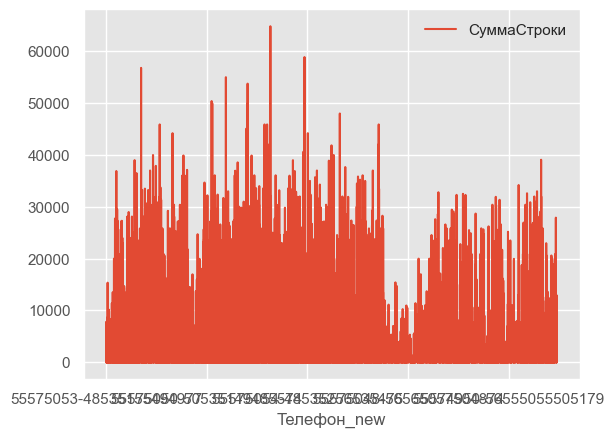

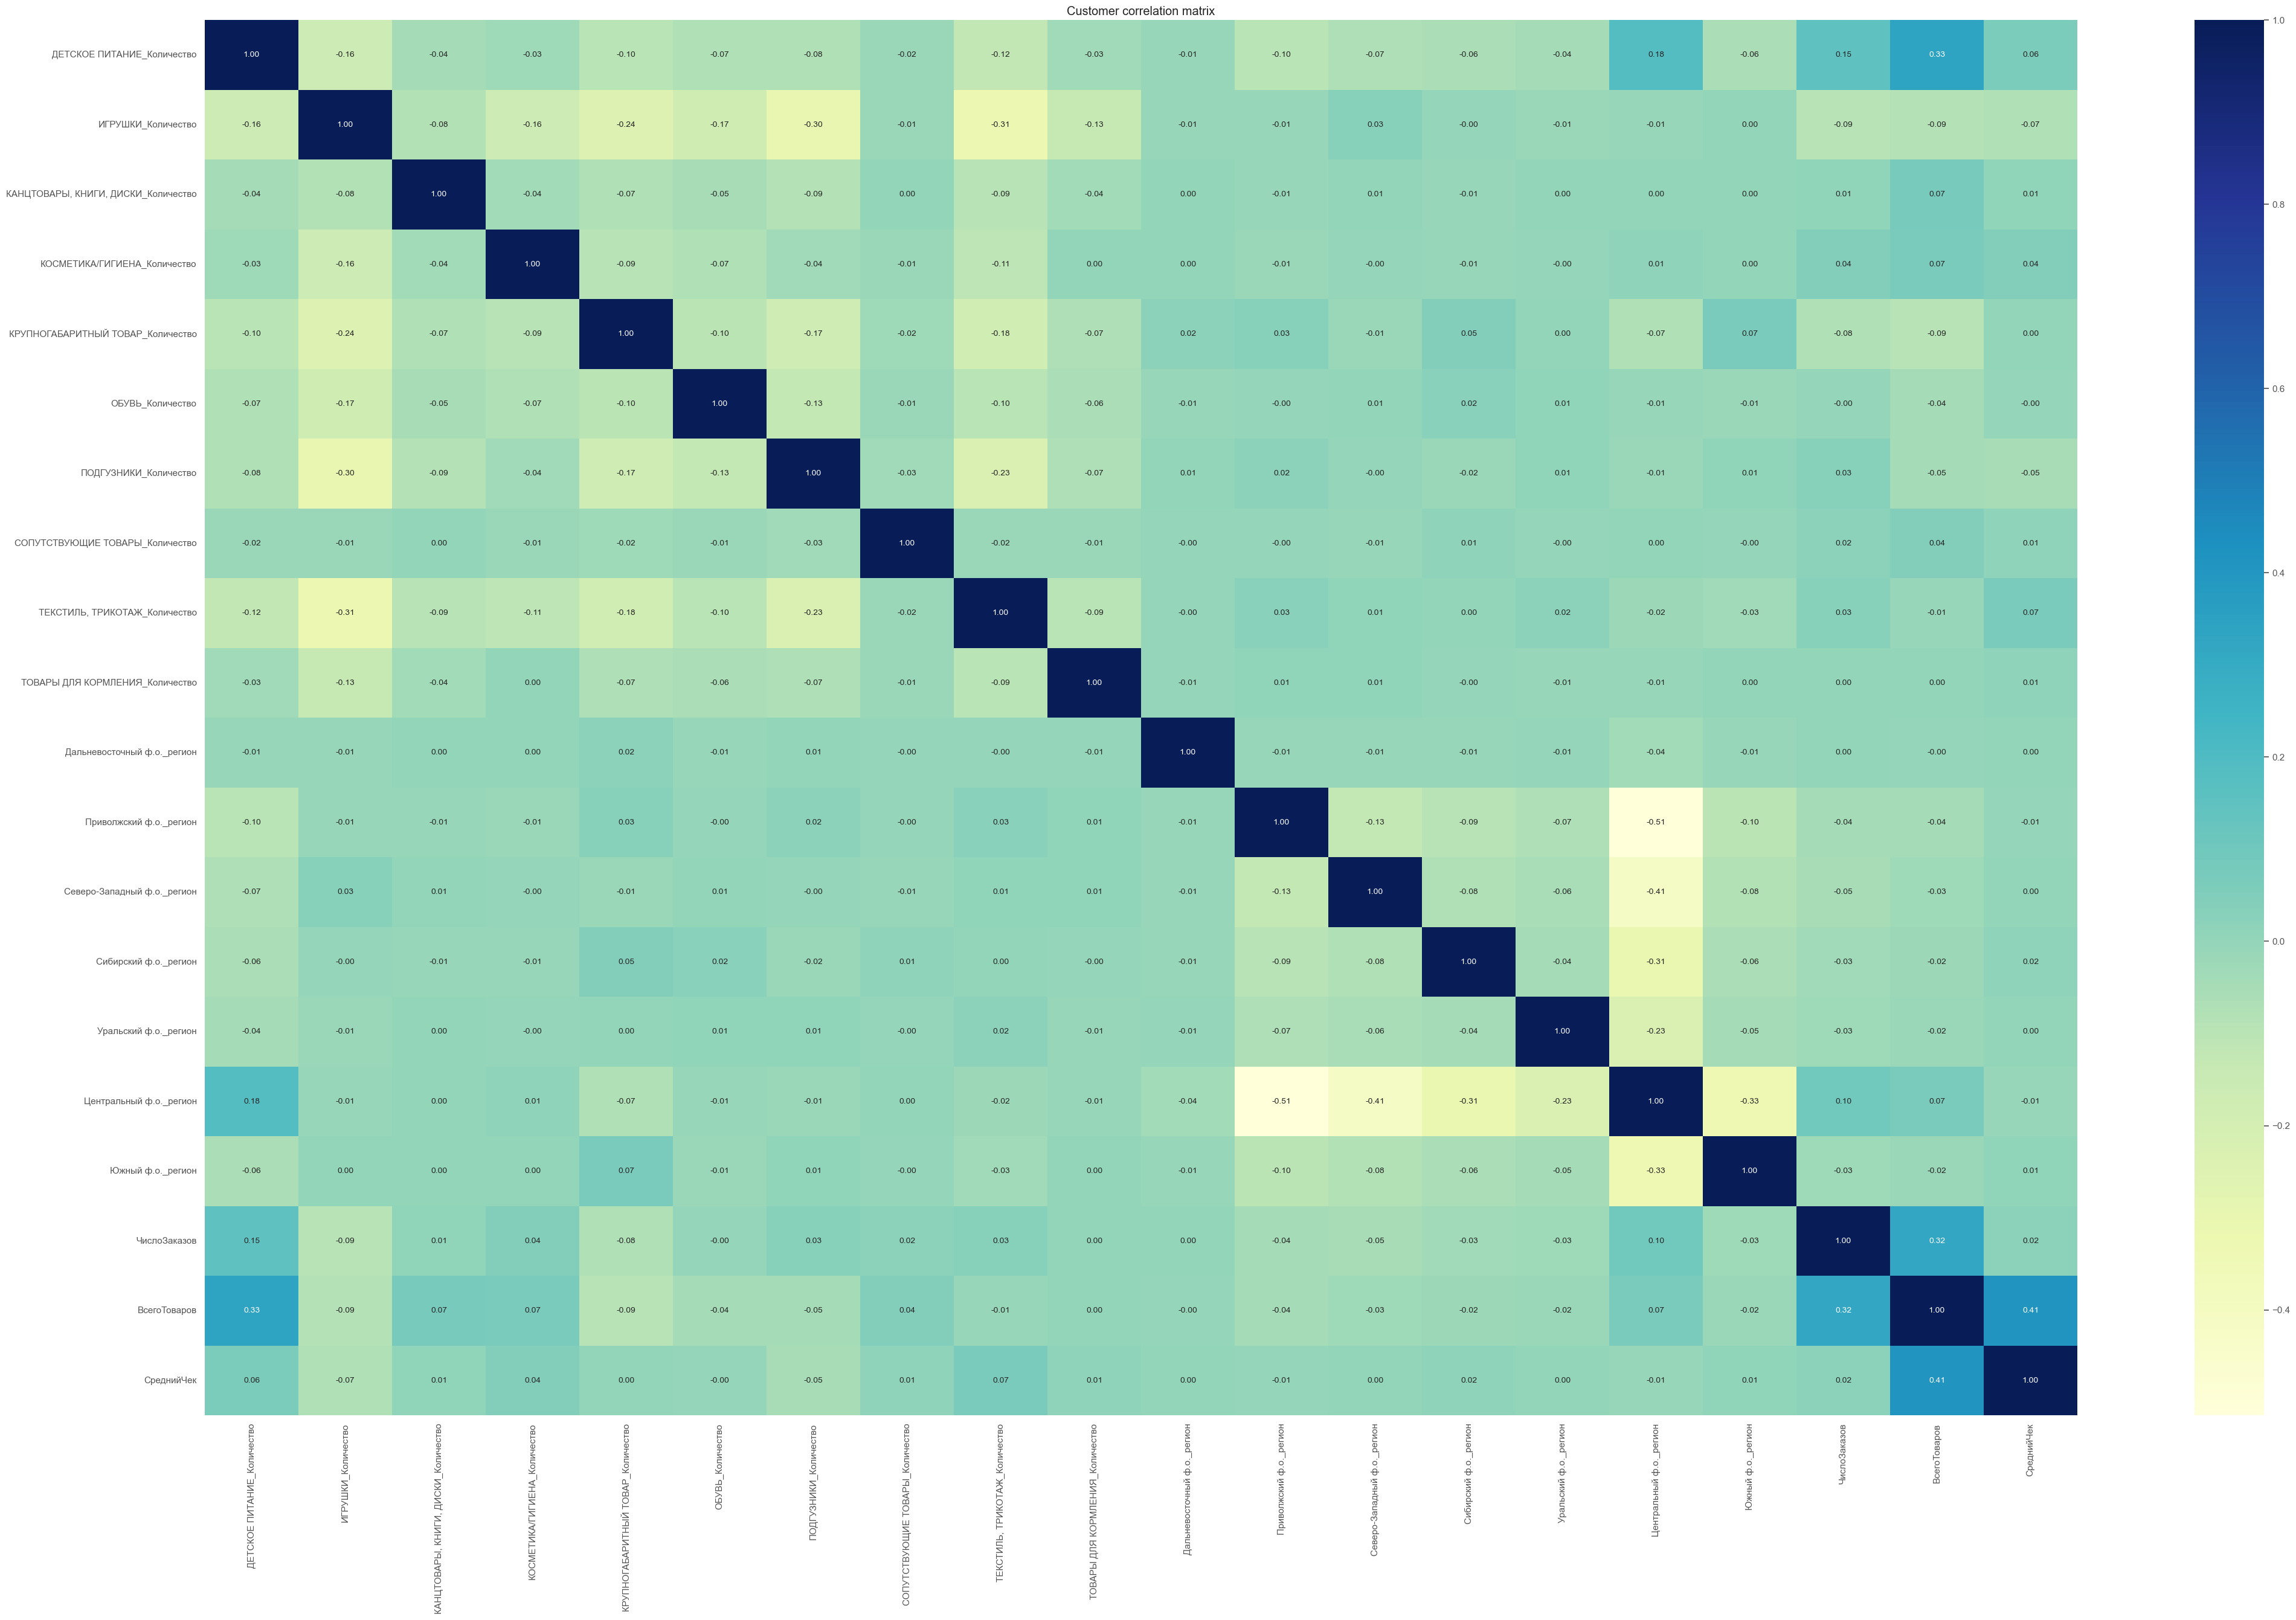

In [354]:
# Select only numeric columns
numeric_final_data = final_data.select_dtypes(include='number')

# Build a heat map just for them
fig = plt.figure(figsize=(50, 30))
sns.heatmap(numeric_final_data.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Customer correlation matrix')
plt.show()

In [355]:
corr = numeric_final_data.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,ДЕТСКОЕ ПИТАНИЕ_Количество,ИГРУШКИ_Количество,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ_Количество",КОСМЕТИКА/ГИГИЕНА_Количество,КРУПНОГАБАРИТНЫЙ ТОВАР_Количество,ОБУВЬ_Количество,ПОДГУЗНИКИ_Количество,СОПУТСТВУЮЩИЕ ТОВАРЫ_Количество,"ТЕКСТИЛЬ, ТРИКОТАЖ_Количество",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ_Количество,Дальневосточный ф.о._регион,Приволжский ф.о._регион,Северо-Западный ф.о._регион,Сибирский ф.о._регион,Уральский ф.о._регион,Центральный ф.о._регион,Южный ф.о._регион,ЧислоЗаказов,ВсегоТоваров,СреднийЧек
ДЕТСКОЕ ПИТАНИЕ_Количество,1.000000,-0.130722,0.012065,0.144745,-0.073368,-0.050727,0.094778,-0.000819,-0.072621,0.115706,-0.008736,-0.101251,-0.071540,-0.062812,-0.043929,0.191213,-0.062339,0.197738,0.361654,0.189242
ИГРУШКИ_Количество,-0.130722,1.000000,0.024868,-0.127498,-0.234280,-0.155927,-0.302295,0.028724,-0.281044,-0.106362,-0.006484,-0.017349,0.026367,-0.007093,-0.015412,0.005108,0.001300,-0.025252,-0.087824,-0.129312
"КАНЦТОВАРЫ, КНИГИ, ДИСКИ_Количество",0.012065,0.024868,1.000000,0.034393,-0.052193,-0.004184,-0.055860,0.087021,-0.029213,0.013180,0.001154,-0.016019,-0.002042,-0.010266,-0.002865,0.017021,0.003244,0.097118,0.207460,0.105753
КОСМЕТИКА/ГИГИЕНА_Количество,0.144745,-0.127498,0.034393,1.000000,-0.035720,-0.048877,0.157997,0.015980,-0.026432,0.207852,0.000431,-0.025893,-0.012107,-0.023200,-0.009696,0.042056,-0.004107,0.167190,0.347521,0.210975
КРУПНОГАБАРИТНЫЙ ТОВАР_Количество,-0.073368,-0.234280,-0.052193,-0.035720,1.000000,-0.105009,-0.154880,-0.019127,-0.150441,-0.008720,0.018389,0.026807,-0.017229,0.038778,-0.000746,-0.063809,0.073418,0.005678,-0.142906,0.147021
ОБУВЬ_Количество,-0.050727,-0.155927,-0.004184,-0.048877,-0.105009,1.000000,-0.129541,0.019429,-0.000067,-0.061151,-0.003074,-0.011118,-0.000621,0.018716,0.008143,0.003110,-0.012713,0.105964,0.062170,0.044793
ПОДГУЗНИКИ_Количество,0.094778,-0.302295,-0.055860,0.157997,-0.154880,-0.129541,1.000000,-0.022077,-0.187495,0.062099,0.002442,0.001914,-0.015950,-0.026181,0.000357,0.018203,0.004055,0.167269,0.223661,0.084433
СОПУТСТВУЮЩИЕ ТОВАРЫ_Количество,-0.000819,0.028724,0.087021,0.015980,-0.019127,0.019429,-0.022077,1.000000,0.031735,0.004449,-0.002552,-0.000761,-0.009019,0.008933,0.000407,0.003396,-0.002574,0.050767,0.104989,0.070823
"ТЕКСТИЛЬ, ТРИКОТАЖ_Количество",-0.072621,-0.281044,-0.029213,-0.026432,-0.150441,-0.000067,-0.187495,0.031735,1.000000,-0.019968,-0.001749,0.018462,0.005842,-0.001579,0.018750,-0.007432,-0.029635,0.126482,0.184813,0.206344
ТОВАРЫ ДЛЯ КОРМЛЕНИЯ_Количество,0.115706,-0.106362,0.013180,0.207852,-0.008720,-0.061151,0.062099,0.004449,-0.019968,1.000000,-0.003537,-0.003708,-0.000866,-0.010828,-0.012917,0.009810,0.006336,0.136689,0.233779,0.144277


### Remove outliers

In [357]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [358]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest

# Fill in the blanks with the mean / median / most frequent
imputer = SimpleImputer(strategy='mean')  # можно попробовать 'median', 'most_frequent'
X_clean = imputer.fit_transform(numeric_final_data)

# Look for anomalies
outlier_detector = IsolationForest(n_estimators=20, random_state=0)
outliers = outlier_detector.fit_predict(X_clean)

# Convert to 0/1 (1 is normal data, -1 is abnormal)
outliers_binary = (outliers + 1) // 2

print('% of outliers with Isolation Forest:', 1 - np.mean(outliers_binary))

% of outliers with Isolation Forest: 0.08216958200276436


In [359]:
numeric_final_data = numeric_final_data.loc[np.array(numeric_final_data.index)[outliers == 1]]

In [360]:
numeric_final_data.head()

,ДЕТСКОЕ ПИТАНИЕ_Количество,ИГРУШКИ_Количество,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ_Количество",КОСМЕТИКА/ГИГИЕНА_Количество,КРУПНОГАБАРИТНЫЙ ТОВАР_Количество,ОБУВЬ_Количество,ПОДГУЗНИКИ_Количество,СОПУТСТВУЮЩИЕ ТОВАРЫ_Количество,"ТЕКСТИЛЬ, ТРИКОТАЖ_Количество",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ_Количество,Дальневосточный ф.о._регион,Приволжский ф.о._регион,Северо-Западный ф.о._регион,Сибирский ф.о._регион,Уральский ф.о._регион,Центральный ф.о._регион,Южный ф.о._регион,ЧислоЗаказов,ВсегоТоваров,СреднийЧек
0,0.0,0.1,0.00,0.9,0.0,0.000,0.0,0.0,0.000,0.0,0,0,0,0,0,1,0,1,10,16002.0
1,0.0,0.0,0.00,0.0,1.0,0.000,0.0,0.0,0.000,0.0,0,0,0,0,0,1,0,1,1,11329.0
2,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.000,1.0,0,1,0,0,0,0,0,1,1,2698.0
6,0.0,0.0,0.25,0.0,0.0,0.083,0.0,0.0,0.667,0.0,0,0,0,0,0,1,0,1,12,30468.0
7,0.0,0.0,0.00,0.0,0.0,0.000,1.0,0.0,0.000,0.0,0,0,0,0,1,0,0,1,3,3396.0


### Normalization

In [362]:
from sklearn import preprocessing

In [363]:
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(numeric_final_data)
numeric_final_data.head()
numeric_final_data.shape

(57771, 20)

### K-means clustering

In [365]:
from sklearn.cluster import KMeans #DBSCAN, AgglomerativeClustering, MeanShift, MiniBatchKMeans, OPTICS
from scipy.spatial.distance import cdist

#### Elbow method

In [367]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X = imputer.fit_transform(X)


distortions = []
K = range(1,16)
for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=7)
    kmeans.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    print(f'{k} / {K[-1]}')

C:\Users\79032\anaconda3\Lib\site-packages\numpy\ma\extras.py:617: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scl = avg.dtype.type(a.count(axis))
C:\Users\79032\anaconda3\Lib\site-packages\numpy\ma\extras.py:617: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scl = avg.dtype.type(a.count(axis))
C:\Users\79032\anaconda3\Lib\site-packages\numpy\ma\extras.py:617: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scl = avg.dtype.type(a.count(axis))
C:\Users\79032\anacond

1 / 15
2 / 15
3 / 15
4 / 15
5 / 15
6 / 15
7 / 15
8 / 15
9 / 15
10 / 15
11 / 15
12 / 15
13 / 15
14 / 15
15 / 15


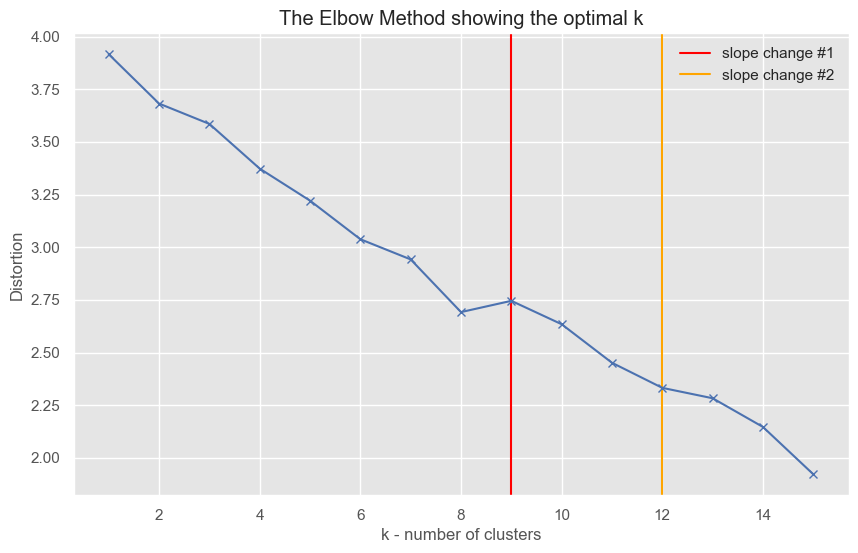

In [368]:
#determination of optimal number of clusters by elbow method
plt.figure(figsize=(10, 6))
plt.axvline(9, 0, 1, label='slope change #1', color='red')
plt.axvline(12, 0, 1, label='slope change #2', color='orange')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.legend(); plt.show()

#### Davies-Boulding Index

In [370]:
from sklearn.metrics import davies_bouldin_score

In [371]:
results_db_kmeans = {}
for i in range(2, 16):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)
    
    db_index = davies_bouldin_score(X, labels)
    results_db_kmeans.update({i: db_index})

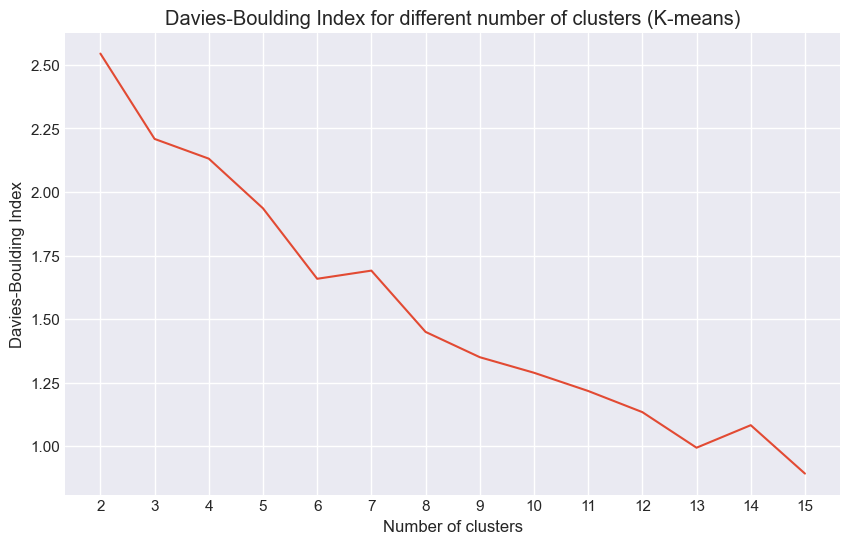

In [372]:

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-darkgrid')
plt.plot(list(results_db_kmeans.keys()), list(results_db_kmeans.values()))

plt.xticks(np.arange(2, 16, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (K-means)')
plt.show()

#### Silhouette Score

In [374]:
from sklearn.metrics import silhouette_score

results_sil_kmeans = {}
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)

    # Count the silhouette on a random subsample only
    sil_score = silhouette_score(X, labels, sample_size=1000, random_state=42)
    results_sil_kmeans[i] = sil_score

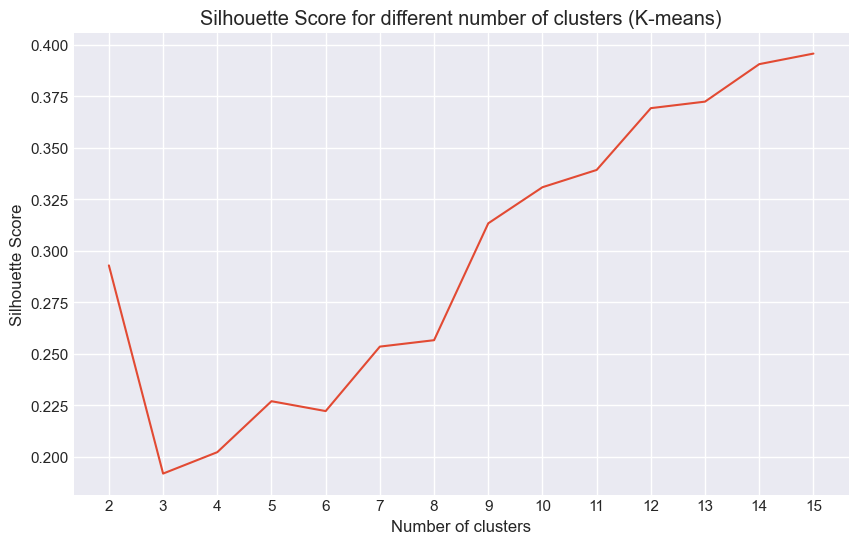

In [375]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_kmeans.keys()), list(results_sil_kmeans.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 16, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (K-means)')
plt.show()

#### Calinski-Harabasz Index

In [377]:
from sklearn.metrics import calinski_harabasz_score

In [378]:
results_ch_kmeans = {}
for i in range(2, 16):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)
    
    ch_score = calinski_harabasz_score(X, labels)
    results_ch_kmeans.update({i: ch_score})

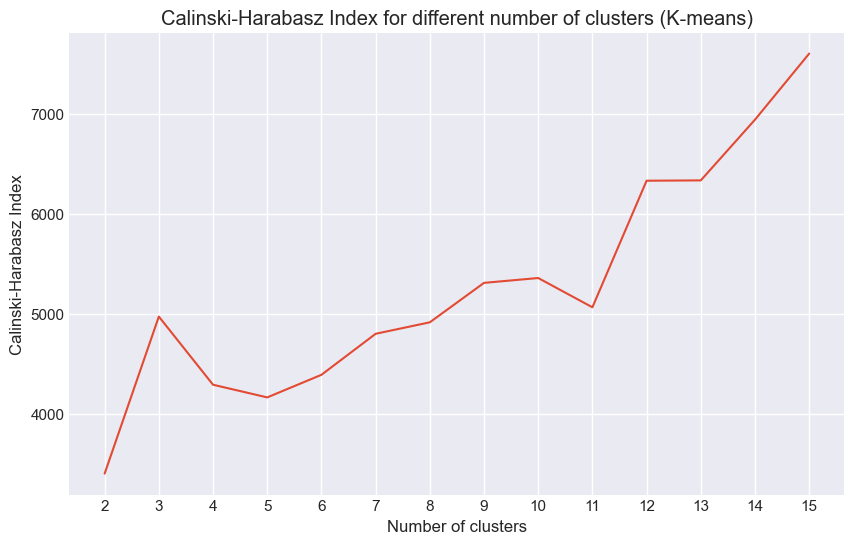

In [379]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_kmeans.keys()), list(results_ch_kmeans.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 16, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (K-means)')
plt.show()

### K-means for 8 clusters

In [381]:
from sklearn.decomposition import PCA, TruncatedSVD

In [382]:
Y_pca = PCA(n_components=3).fit_transform(X);
Y_svd = TruncatedSVD(n_components=3).fit_transform(X);

In [383]:
K = 8
#kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
kmeanModel = KMeans(n_clusters=K).fit(X)

C:\Users\79032\AppData\Local\Temp\ipykernel_2224\2712689351.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_labels))  # получаем палитру


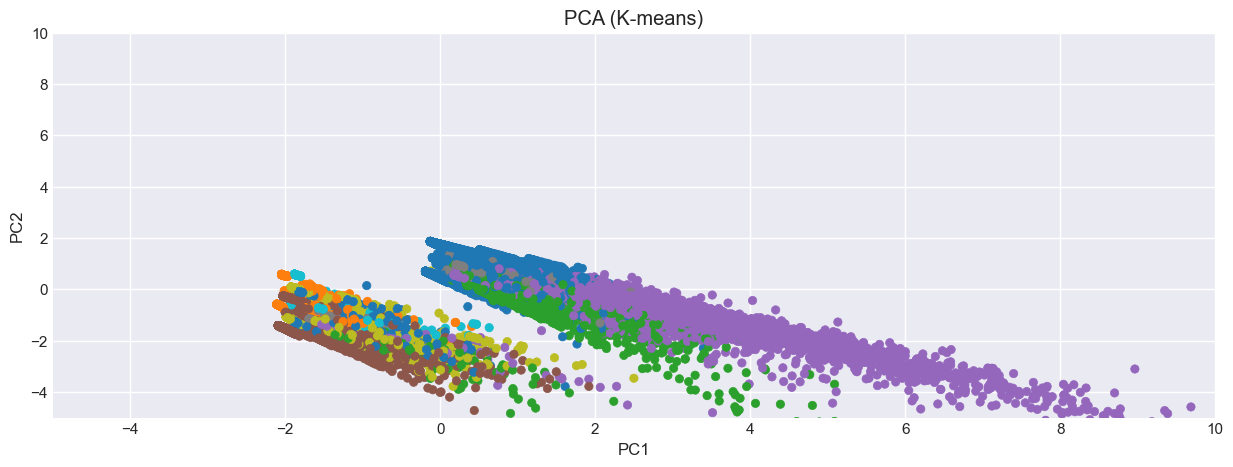

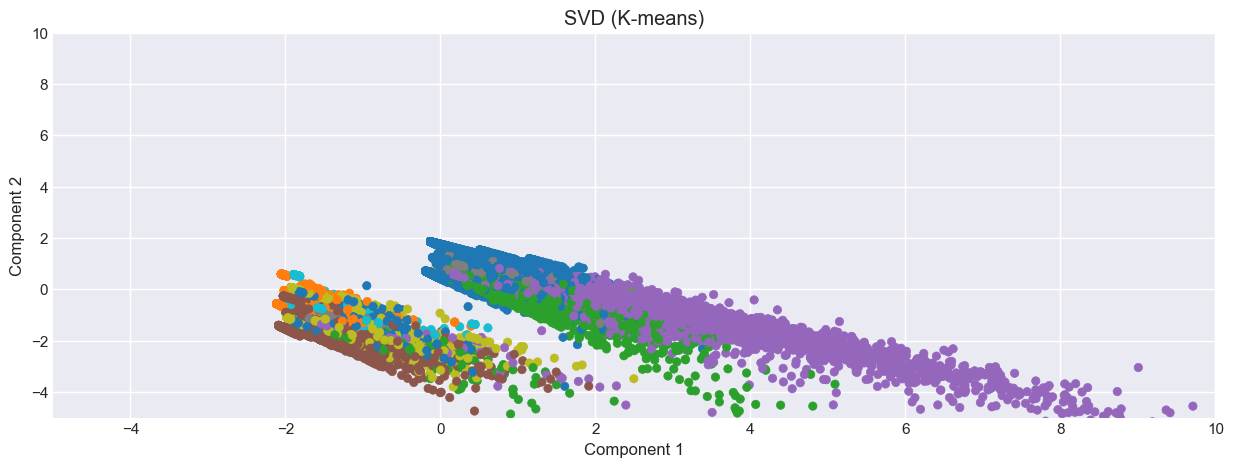

In [384]:
import matplotlib.pyplot as plt
import numpy as np
unique_labels = np.unique(kmeanModel.labels_)
colors = plt.cm.get_cmap('tab10', len(unique_labels))  # получаем палитру


c_arr = colors(kmeanModel.labels_)

# PCA Visualization
plt.figure(figsize=(15, 5))
plt.title('PCA (K-means)')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c = c_arr)
plt.xlabel("PC1")
plt.ylabel("PC2")


plt.xlim(-5, 10)  
plt.ylim(-5, 10)    

plt.grid(True)
plt.show()

# SVD Visualization
plt.figure(figsize=(15, 5))
plt.title('SVD (K-means)')
plt.scatter(Y_svd[:, 0], Y_svd[:, 1], c = c_arr)
plt.xlabel("Component 1")
plt.ylabel("Component 2")


plt.xlim(-5, 10)
plt.ylim(-5, 10)


plt.grid(True)
plt.show()

In [385]:
print(Y_pca.shape)  
print(Y_svd.shape)  

(57771, 3)
(57771, 3)


In [386]:
# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels = kmeanModel.labels_

numeric_final_data['Labels'] = kmeanModel.labels_

df_1 = numeric_final_data[(numeric_final_data['Labels'] == 0)]
df_2 = numeric_final_data[(numeric_final_data['Labels'] == 1)]
df_3 = numeric_final_data[(numeric_final_data['Labels'] == 2)]
df_4 = numeric_final_data[(numeric_final_data['Labels'] == 3)]
df_5 = numeric_final_data[(numeric_final_data['Labels'] == 4)]
df_6 = numeric_final_data[(numeric_final_data['Labels'] == 5)]
df_7 = numeric_final_data[(numeric_final_data['Labels'] == 6)]
df_8 = numeric_final_data[(numeric_final_data['Labels'] == 7)]


print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))

print('numeric_final_data: ', len(numeric_final_data))

Segment 1:  19913
Segment 2:  1832
Segment 3:  8265
Segment 4:  11751
Segment 5:  7277
Segment 6:  3284
Segment 7:  4738
Segment 8:  711
numeric_final_data:  57771


In [387]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
%matplotlib inline

In [388]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Dimensionality reduction
pca = PCA(n_components=20)
X_reduced = pca.fit_transform(X)

# Sub-sample for metrics
X_train, X_test, y_train, y_test = train_test_split(X_reduced, labels, test_size=0.05, random_state=42)

# Calculating metrics
print(f"Silhouette Score: {silhouette_score(X_test, y_test, metric='cosine'):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_test, y_test):.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X_test, y_test):.0f}")

Silhouette Score: 0.4293
Davies-Bouldin Index: 1.4475
Calinski-Harabasz Index: 268


In [389]:
numeric_final_data.groupby('Labels').sum().to_excel('8_klasters.xlsx')

In [390]:
numeric_final_data.to_excel('8_klasters_ne_summa.xlsx')

### K-means for 10 clusters

In [392]:
K = 10
#kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
kmeanModel = KMeans(n_clusters=K).fit(X)

In [393]:
# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels = kmeanModel.labels_

numeric_final_data['Labels'] = kmeanModel.labels_

df_1 = numeric_final_data[(numeric_final_data['Labels'] == 0)]
df_2 = numeric_final_data[(numeric_final_data['Labels'] == 1)]
df_3 = numeric_final_data[(numeric_final_data['Labels'] == 2)]
df_4 = numeric_final_data[(numeric_final_data['Labels'] == 3)]
df_5 = numeric_final_data[(numeric_final_data['Labels'] == 4)]
df_6 = numeric_final_data[(numeric_final_data['Labels'] == 5)]
df_7 = numeric_final_data[(numeric_final_data['Labels'] == 6)]
df_8 = numeric_final_data[(numeric_final_data['Labels'] == 7)]
df_9 = numeric_final_data[(numeric_final_data['Labels'] == 8)]
df_10 = numeric_final_data[(numeric_final_data['Labels'] == 9)]


print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))
print('Segment 10: ', len(df_10))
print('numeric_final_data: ', len(numeric_final_data))

Segment 1:  1679
Segment 2:  21074
Segment 3:  6380
Segment 4:  12427
Segment 5:  1832
Segment 6:  5232
Segment 7:  190
Segment 8:  711
Segment 9:  3136
Segment 10:  5110
numeric_final_data:  57771


In [394]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Dimensionality reduction
pca = PCA(n_components=20) 
X_reduced = pca.fit_transform(X)

# Sub-sample for metrics
X_train, X_test, y_train, y_test = train_test_split(X_reduced, labels, test_size=0.05, random_state=42)

# Шаг 3: Считаем метрики
print(f"Silhouette Score: {silhouette_score(X_test, y_test, metric='cosine'):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_test, y_test):.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X_test, y_test):.0f}")

Silhouette Score: 0.4452
Davies-Bouldin Index: 1.2646
Calinski-Harabasz Index: 278


In [395]:
numeric_final_data.groupby('Labels').sum().to_excel('10_klasters_ne_summa.xlsx')

In [396]:
numeric_final_data.to_excel('10_klasters_ne_summa.xlsx')

### K-means for 12 clusters

In [398]:
K = 12
#kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
kmeanModel = KMeans(n_clusters=K).fit(X)

In [399]:
# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels = kmeanModel.labels_

numeric_final_data['Labels'] = kmeanModel.labels_

df_1 = numeric_final_data[(numeric_final_data['Labels'] == 0)]
df_2 = numeric_final_data[(numeric_final_data['Labels'] == 1)]
df_3 = numeric_final_data[(numeric_final_data['Labels'] == 2)]
df_4 = numeric_final_data[(numeric_final_data['Labels'] == 3)]
df_5 = numeric_final_data[(numeric_final_data['Labels'] == 4)]
df_6 = numeric_final_data[(numeric_final_data['Labels'] == 5)]
df_7 = numeric_final_data[(numeric_final_data['Labels'] == 6)]
df_8 = numeric_final_data[(numeric_final_data['Labels'] == 7)]
df_9 = numeric_final_data[(numeric_final_data['Labels'] == 8)]
df_10 = numeric_final_data[(numeric_final_data['Labels'] == 9)]
df_11 = numeric_final_data[(numeric_final_data['Labels'] == 10)]
df_12 = numeric_final_data[(numeric_final_data['Labels'] == 11)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
print('Segment 5: ', len(df_5))
print('Segment 6: ', len(df_6))
print('Segment 7: ', len(df_7))
print('Segment 8: ', len(df_8))
print('Segment 9: ', len(df_9))
print('Segment 10: ', len(df_10))
print('Segment 11: ', len(df_11))
print('Segment 12: ', len(df_12))
print('numeric_final_data: ', len(numeric_final_data))

Segment 1:  11674
Segment 2:  6662
Segment 3:  3903
Segment 4:  14088
Segment 5:  6847
Segment 6:  3125
Segment 7:  4438
Segment 8:  2750
Segment 9:  54
Segment 10:  711
Segment 11:  1687
Segment 12:  1832
numeric_final_data:  57771


In [400]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Dimensionality reduction
pca = PCA(n_components=20) 
X_reduced = pca.fit_transform(X)

# Sub-sample for metrics
X_train, X_test, y_train, y_test = train_test_split(X_reduced, labels, test_size=0.05, random_state=42)

# Calculating metrics
print(f"Silhouette Score: {silhouette_score(X_test, y_test, metric='cosine'):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_test, y_test):.4f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X_test, y_test):.0f}")

Silhouette Score: 0.5254
Davies-Bouldin Index: 1.1148
Calinski-Harabasz Index: 324


In [401]:
numeric_final_data.groupby('Labels').sum().to_excel('12_klasters.xlsx')

In [402]:
numeric_final_data.to_excel('12_klasters_ne_summa.xlsx')

## Expectation-Maximization Algorithm (EM-clustering)

In [404]:
from sklearn.mixture import GaussianMixture

Explained variance after PCA.: 1.00
Clusters: 2
Silhouette Score: 0.1537

Clusters: 3
Silhouette Score: 0.2409

Clusters: 4
Silhouette Score: 0.2785

Clusters: 5
Silhouette Score: 0.2201

Clusters: 6
Silhouette Score: 0.2519

Clusters: 7
Silhouette Score: 0.2627

Clusters: 8
Silhouette Score: 0.2841

Clusters: 9
Silhouette Score: 0.2818

Clusters: 10
Silhouette Score: 0.3712

Clusters: 11
Silhouette Score: 0.3263

Clusters: 12
Silhouette Score: 0.3344

Clusters: 13
Silhouette Score: 0.3583



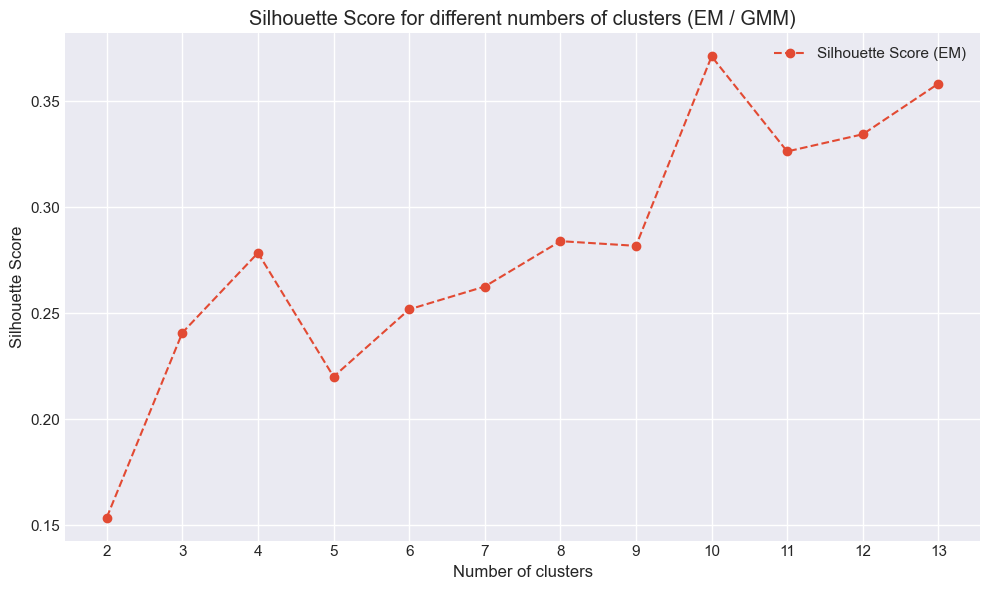

In [405]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Dimensionality reduction
pca = PCA(n_components=20)
X_reduced = pca.fit_transform(X)

print(f"Explained variance after PCA.: {pca.explained_variance_ratio_.sum():.2f}")

# Divide our data to train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, 
    numeric_final_data.index, 
    test_size=0.1, 
    random_state=42
)

results_sil_em = {}

for i in range(2, 14):
    print(f'Clusters: {i}')
    
    # Teaching GMM on the training part
    gmm = GaussianMixture(n_components=i, covariance_type='diag', random_state=42)
    gmm.fit(X_train)
    labels_pred = gmm.predict(X_test)
    
    # Checking that there's more than one cluster
    if len(np.unique(labels_pred)) < 2:
        print(f"Only one cluster for {i}")
        continue

    # Taking a subsample from the test
    X_train_part, X_sub, y_train_part, y_sub = train_test_split(
        X_test, 
        labels_pred, 
        test_size=0.2, 
        random_state=42
    )

    # Calculate the silhouette factor
    sil_score = silhouette_score(X_sub, y_sub, metric='cosine')
    results_sil_em[i] = sil_score
    print(f"Silhouette Score: {sil_score:.4f}\n")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(list(results_sil_em.keys()), list(results_sil_em.values()), marker='o', linestyle='--', label='Silhouette Score (EM)')
plt.xticks(range(2, 14))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different numbers of clusters (EM / GMM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

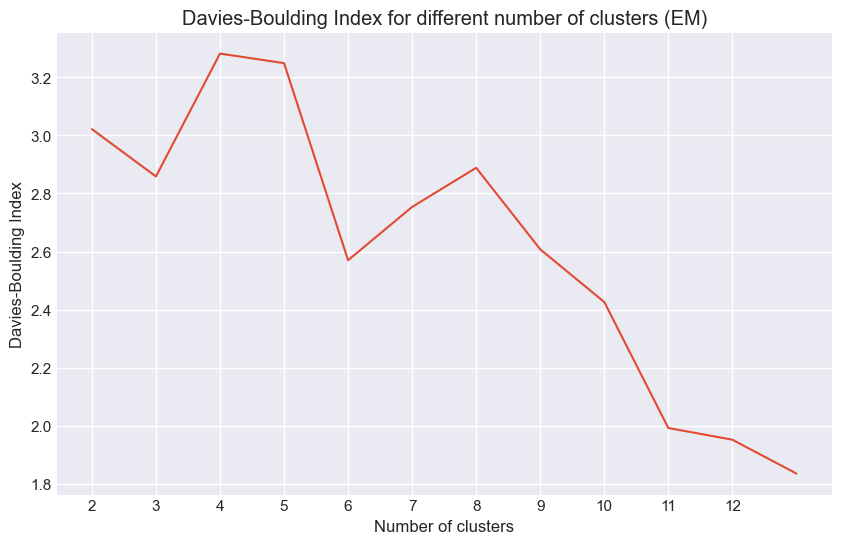

In [406]:
from sklearn import metrics
results_ch_em = {}
for i in range(2, 14):
    
    gm = GaussianMixture(n_components = i)
    labels = gm.fit_predict(X)
    
    ch_score = metrics.davies_bouldin_score(X, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 13, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (EM)')
plt.show()

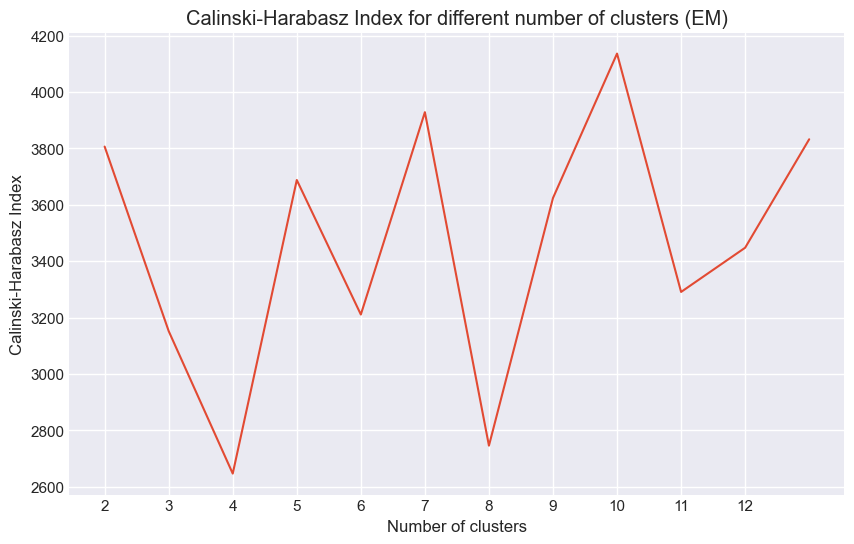

In [407]:
results_ch_em = {}
for i in range(2, 14):
    
    gm = GaussianMixture(n_components = i)
    labels = gm.fit_predict(X)
    
    ch_score = metrics.calinski_harabasz_score(X, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 13, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (EM)')
plt.show()

In [408]:
numeric_final_data.head()


,ДЕТСКОЕ ПИТАНИЕ_Количество,ИГРУШКИ_Количество,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ_Количество",КОСМЕТИКА/ГИГИЕНА_Количество,КРУПНОГАБАРИТНЫЙ ТОВАР_Количество,ОБУВЬ_Количество,ПОДГУЗНИКИ_Количество,СОПУТСТВУЮЩИЕ ТОВАРЫ_Количество,"ТЕКСТИЛЬ, ТРИКОТАЖ_Количество",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ_Количество,...,Приволжский ф.о._регион,Северо-Западный ф.о._регион,Сибирский ф.о._регион,Уральский ф.о._регион,Центральный ф.о._регион,Южный ф.о._регион,ЧислоЗаказов,ВсегоТоваров,СреднийЧек,Labels
0,0.0,0.1,0.00,0.9,0.0,0.000,0.0,0.0,0.000,0.0,...,0,0,0,0,1,0,1,10,16002.0,7
1,0.0,0.0,0.00,0.0,1.0,0.000,0.0,0.0,0.000,0.0,...,0,0,0,0,1,0,1,1,11329.0,3
2,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.000,1.0,...,1,0,0,0,0,0,1,1,2698.0,4
6,0.0,0.0,0.25,0.0,0.0,0.083,0.0,0.0,0.667,0.0,...,0,0,0,0,1,0,1,12,30468.0,3
7,0.0,0.0,0.00,0.0,0.0,0.000,1.0,0.0,0.000,0.0,...,0,0,0,1,0,0,1,3,3396.0,9


In [586]:
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(numeric_final_data.iloc[:,1:])

In [588]:
import scipy

scipy.stats.normaltest(X)

from sklearn.impute import KNNImputer

# Filling in the gaps through the nearest neighbors
knn_imputer = KNNImputer(n_neighbors=5)
X_knn_filled = knn_imputer.fit_transform(X)

# Apply dimensionality reduction techniques
Y_pca = PCA(n_components=3).fit_transform(X_knn_filled)
Y_svd = TruncatedSVD(n_components=3).fit_transform(X_knn_filled)

C:\Users\79032\anaconda3\Lib\site-packages\numpy\ma\extras.py:617: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scl = avg.dtype.type(a.count(axis))
C:\Users\79032\anaconda3\Lib\site-packages\numpy\ma\extras.py:617: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scl = avg.dtype.type(a.count(axis))
C:\Users\79032\anaconda3\Lib\site-packages\numpy\ma\extras.py:617: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  scl = avg.dtype.type(a.count(axis))
C:\Users\79032\anacond

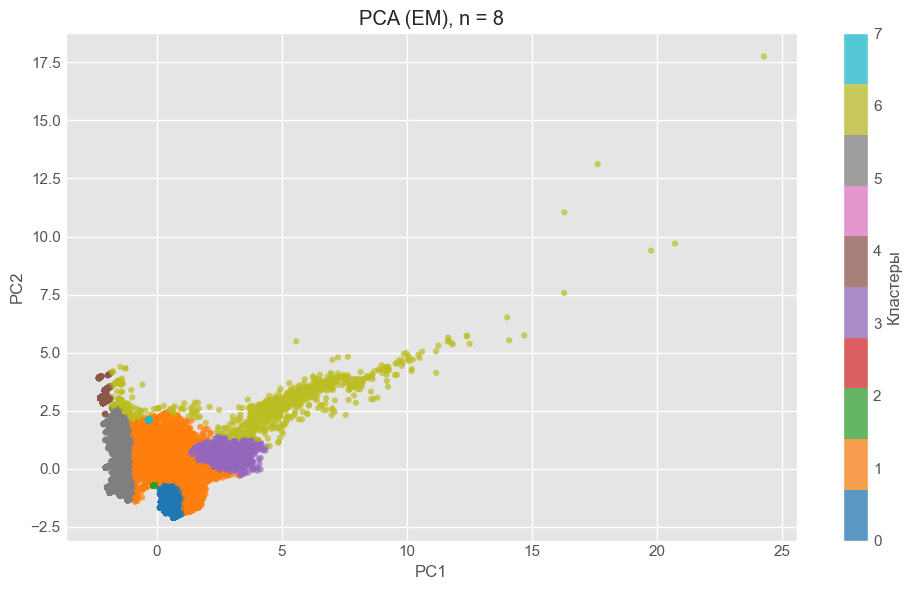

In [590]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Data preparation
numeric_cols = numeric_final_data.select_dtypes(include='number').columns.tolist()
X = numeric_final_data[numeric_cols].values

# Pipeline: gap filling + normalization + PCA
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    PCA(n_components=2, random_state=42)
)
Y_pca = pipeline.fit_transform(X)

# EM clustering (GMM)
n = 8
gm = GaussianMixture(n_components=n, covariance_type='diag', random_state=42)
labels = gm.fit_predict(Y_pca) 

# Adding labels to DataFrame
numeric_final_data['Labels'] = labels  

# Visualization of clusters through PCA
plt.figure(figsize=(10, 6))
plt.title(f'PCA (EM), n = {n}')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=labels, cmap='tab10', s=20, alpha=0.7, edgecolor='none')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.colorbar(label='Кластеры')
plt.show()

In [412]:
numeric_final_data.head()

,ДЕТСКОЕ ПИТАНИЕ_Количество,ИГРУШКИ_Количество,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ_Количество",КОСМЕТИКА/ГИГИЕНА_Количество,КРУПНОГАБАРИТНЫЙ ТОВАР_Количество,ОБУВЬ_Количество,ПОДГУЗНИКИ_Количество,СОПУТСТВУЮЩИЕ ТОВАРЫ_Количество,"ТЕКСТИЛЬ, ТРИКОТАЖ_Количество",ТОВАРЫ ДЛЯ КОРМЛЕНИЯ_Количество,...,Приволжский ф.о._регион,Северо-Западный ф.о._регион,Сибирский ф.о._регион,Уральский ф.о._регион,Центральный ф.о._регион,Южный ф.о._регион,ЧислоЗаказов,ВсегоТоваров,СреднийЧек,Labels
0,0.0,0.1,0.00,0.9,0.0,0.000,0.0,0.0,0.000,0.0,...,0,0,0,0,1,0,1,10,16002.0,0
1,0.0,0.0,0.00,0.0,1.0,0.000,0.0,0.0,0.000,0.0,...,0,0,0,0,1,0,1,1,11329.0,6
2,0.0,0.0,0.00,0.0,0.0,0.000,0.0,0.0,0.000,1.0,...,1,0,0,0,0,0,1,1,2698.0,2
6,0.0,0.0,0.25,0.0,0.0,0.083,0.0,0.0,0.667,0.0,...,0,0,0,0,1,0,1,12,30468.0,1
7,0.0,0.0,0.00,0.0,0.0,0.000,1.0,0.0,0.000,0.0,...,0,0,0,1,0,0,1,3,3396.0,4


In [413]:
df_1 = numeric_final_data[(numeric_final_data['Labels'] == 0)]
df_2 = numeric_final_data[(numeric_final_data['Labels'] == 1)]
df_3 = numeric_final_data[(numeric_final_data['Labels'] == 2)]
df_4 = numeric_final_data[(numeric_final_data['Labels'] == 3)]
df_5 = numeric_final_data[(numeric_final_data['Labels'] == 4)]
df_6 = numeric_final_data[(numeric_final_data['Labels'] == 5)]
df_7 = numeric_final_data[(numeric_final_data['Labels'] == 6)]
df_8 = numeric_final_data[(numeric_final_data['Labels'] == 7)]

data_sel8={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8}

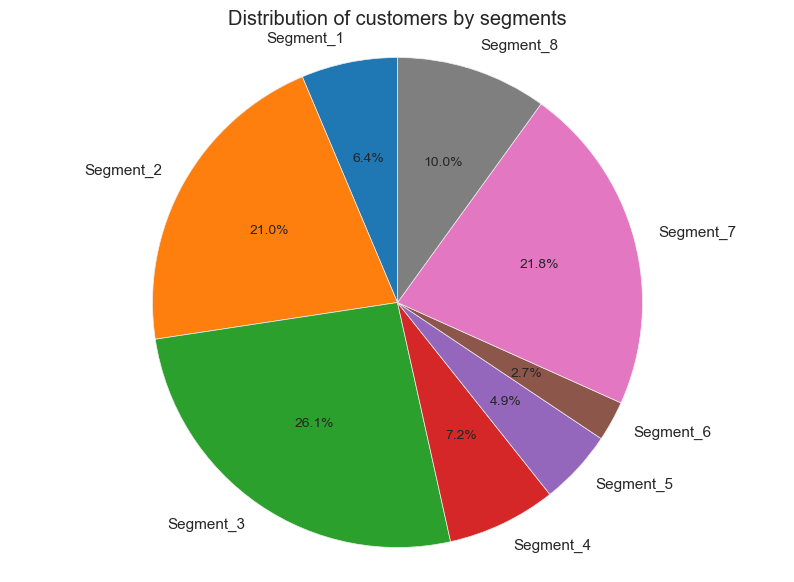

In [414]:
data = [len(i) for i in data_sel8.values()]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels = [f'Segment_{i+1}' for i in range(len(data))], autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Distribution of customers by segments')
plt.axis('equal')
plt.show()

In [415]:
numeric_final_data.to_excel('EM_8_klasters_ne_summa.xlsx')

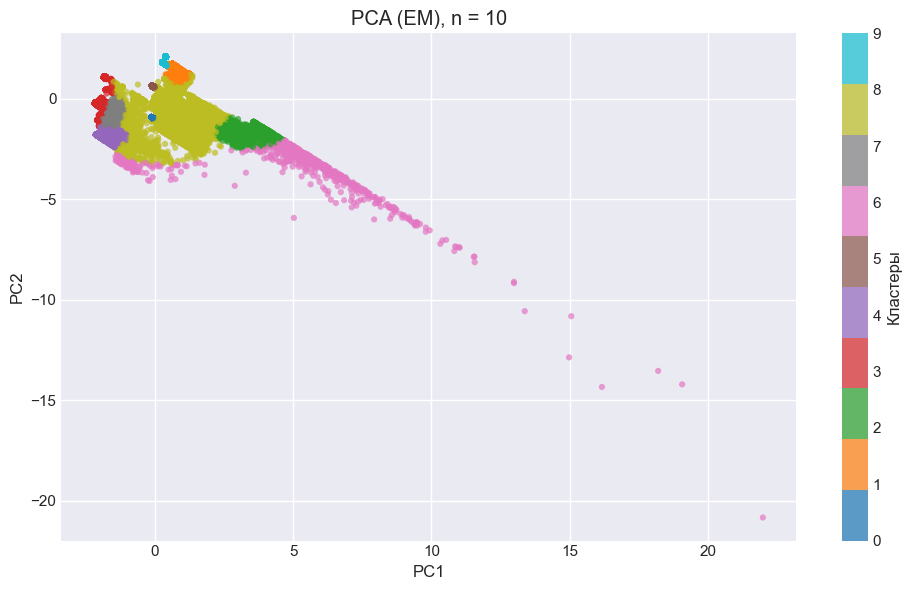

In [416]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Data preparation
numeric_cols = numeric_final_data.select_dtypes(include='number').columns.tolist()
X = numeric_final_data[numeric_cols].values

# Pipeline: gap filling + normalization + PCA
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    PCA(n_components=2, random_state=42)
)
Y_pca = pipeline.fit_transform(X)

# EM clustering (GMM)
n = 10
gm = GaussianMixture(n_components=n, covariance_type='diag', random_state=42)
labels = gm.fit_predict(Y_pca)  

# Adding labels to DataFrame
numeric_final_data['Labels'] = labels  

# Visualization of clusters through PCA
plt.figure(figsize=(10, 6))
plt.title(f'PCA (EM), n = {n}')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=labels, cmap='tab10', s=20, alpha=0.7, edgecolor='none')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.colorbar(label='Кластеры')
plt.show()

In [417]:
df_1 = numeric_final_data[(numeric_final_data['Labels'] == 0)]
df_2 = numeric_final_data[(numeric_final_data['Labels'] == 1)]
df_3 = numeric_final_data[(numeric_final_data['Labels'] == 2)]
df_4 = numeric_final_data[(numeric_final_data['Labels'] == 3)]
df_5 = numeric_final_data[(numeric_final_data['Labels'] == 4)]
df_6 = numeric_final_data[(numeric_final_data['Labels'] == 5)]
df_7 = numeric_final_data[(numeric_final_data['Labels'] == 6)]
df_8 = numeric_final_data[(numeric_final_data['Labels'] == 7)]
df_9 = numeric_final_data[(numeric_final_data['Labels'] == 8)]
df_10 = numeric_final_data[(numeric_final_data['Labels'] == 9)]

data_sel10={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9, 9: df_10}

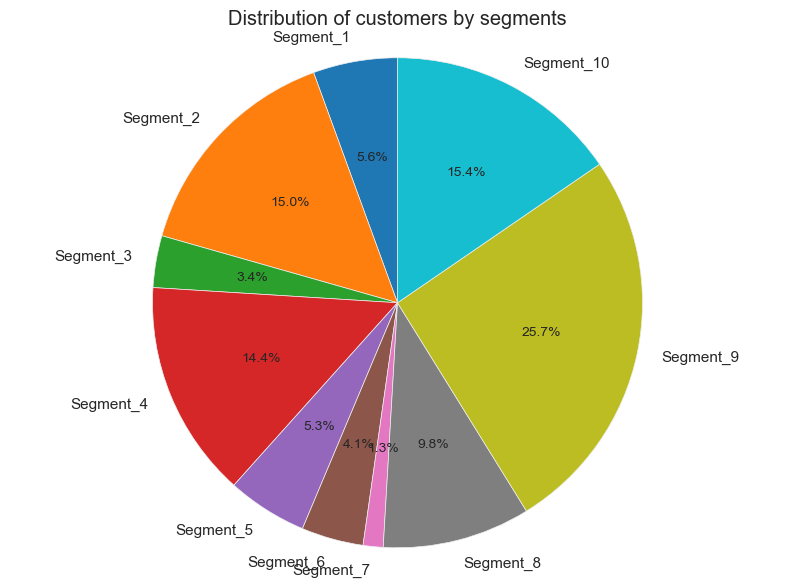

In [418]:
data = [len(i) for i in data_sel10.values()]


fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels = [f'Segment_{i+1}' for i in range(len(data))], autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Distribution of customers by segments')
plt.axis('equal') 
plt.show()

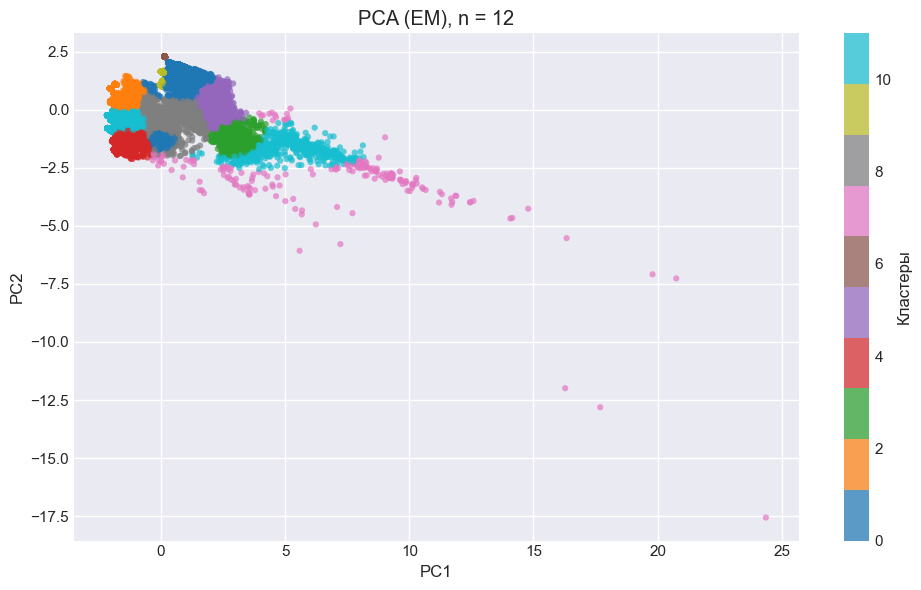

In [419]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Data preparation
numeric_cols = numeric_final_data.select_dtypes(include='number').columns.tolist()
X = numeric_final_data[numeric_cols].values

# Pipeline: gap filling + normalization + PCA
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    PCA(n_components=2, random_state=42)
)
Y_pca = pipeline.fit_transform(X)

# EM clustering (GMM)
n = 12
gm = GaussianMixture(n_components=n, covariance_type='diag', random_state=42)
labels = gm.fit_predict(Y_pca)  

# Adding labels to DataFrame
numeric_final_data['Labels'] = labels  

# Visualization of clusters through PCA
plt.figure(figsize=(10, 6))
plt.title(f'PCA (EM), n = {n}')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=labels, cmap='tab10', s=20, alpha=0.7, edgecolor='none')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.colorbar(label='Кластеры')
plt.show()

In [420]:
df = numeric_final_data
df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
df_5 = df[(df['Labels'] == 4)]
df_6 = df[(df['Labels'] == 5)]
df_7 = df[(df['Labels'] == 6)]
df_8 = df[(df['Labels'] == 7)]
df_9 = df[(df['Labels'] == 8)]
df_10 = df[(df['Labels'] == 9)]
df_11 = df[(df['Labels'] == 10)]
df_11 = df[(df['Labels'] == 10)]
df_12 = df[(df['Labels'] == 10)]
data_sel12={0: df_1, 1: df_2, 2: df_3, 3: df_4, 4: df_5, 5: df_6, 6: df_7, 7: df_8, 8: df_9, 9: df_10, 10: df_11, 11: df_12}

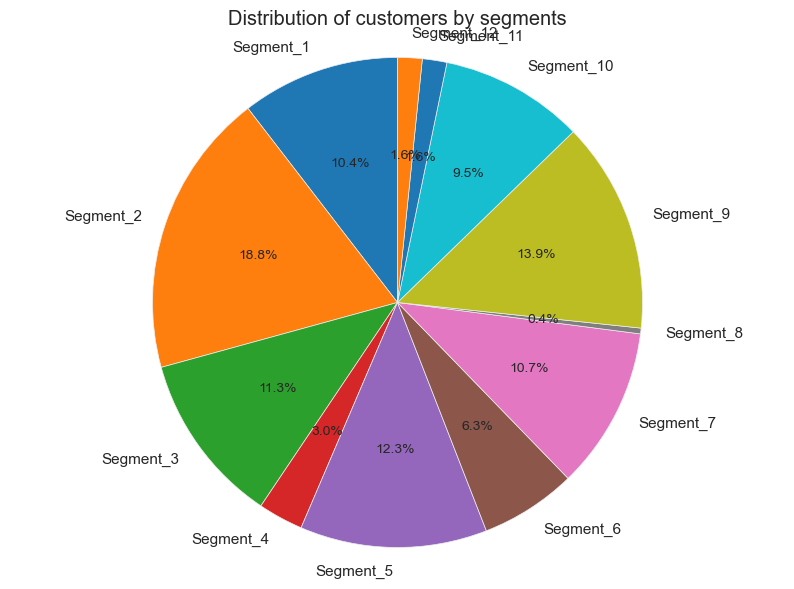

In [421]:
data = [len(i) for i in data_sel12.values()]

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels = [f'Segment_{i+1}' for i in range(len(data))], autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Distribution of customers by segments')
plt.axis('equal')
plt.show()

## Market Basket Analysis

In [423]:
df_mba.head()
df_mba.shape

(223975, 21)

In [424]:
print(df_mba.columns)

Index(['Дата', 'НомерЗаказаНаСайте', 'СуммаЗаказаНаСайте', 'СуммаДокумента',
       'ФормаОплаты', 'Регион', 'Группа2', 'Группа3', 'Тип', 'Номенклатура',
       'Количество', 'Цена', 'СуммаСтроки', 'ЦенаЗакупки', 'Маржа',
       'СуммаУслуг', 'СуммаДоставки', 'НомерСтроки',
       'КоличествоПроданоКлиенту', 'Телефон_new', 'НеделяЗаказа'],
      dtype='object')


In [425]:
df_mba = df_mba.drop(columns = ['СуммаДокумента'])

In [426]:
df_mba.head()

,Дата,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,ФормаОплаты,Регион,Группа2,Группа3,Тип,Номенклатура,Количество,Цена,СуммаСтроки,ЦенаЗакупки,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,НеделяЗаказа
7,03.02.2018 13:24,7309727_TR,5037,Безналичная,Центральный ф.о.,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,ППКП,"БАБУШКИНО ЛУКОШКО, ПЮРЕ говядина-гречка, (100 г)",2,43,86.0,"39,22",7.56,0,0,28,2,55575053-48535155494977,5
9,01.02.2018 12:00,7292069_TR,1479,Безналичная,Центральный ф.о.,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ,ИГРУШКИ,ГЛАЗКИ Всюду разные цвета,1,81,81.0,"53,79",27.21,49,49,1,1,55575452-55545552515278,5
11,02.02.2018 21:23,7306300_TR,10380,Безналичная,Приволжский ф.о.,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ,ИГРУШКИ,"УМКА, РАСКРАСКА. Наклей и раскрась Каникулы в ...",1,46,46.0,"39,03",6.97,99,99,11,1,55575055-50545457495371,5
13,04.02.2018 22:03,7323243_TR,2092,Безналичная,Приволжский ф.о.,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,ИГРУШКИ,"ИГРАЕМ ВМЕСТЕ, ИГРУШКА для купания Винни-Пух, ...",1,147,147.0,"81,2",65.80,99,99,6,1,55575055-55535051565372,5
14,03.02.2018 12:01,7309069_ES,1050,Безналичная,Центральный ф.о.,КРУПНОГАБАРИТНЫЙ ТОВАР,САНКИ/СНЕГОКАТЫ,КГТ,ЛЫЖИ дет.,2,525,1050.0,"355,85",338.30,0,0,1,2,55574853-55495148505671,5


In [427]:
df_mba['Группа2_Группа3'] = df_mba['Группа2']+'_'+df_mba['Группа3']

In [428]:
df_mba.head()

,Дата,НомерЗаказаНаСайте,СуммаЗаказаНаСайте,ФормаОплаты,Регион,Группа2,Группа3,Тип,Номенклатура,Количество,...,СуммаСтроки,ЦенаЗакупки,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,Телефон_new,НеделяЗаказа,Группа2_Группа3
7,03.02.2018 13:24,7309727_TR,5037,Безналичная,Центральный ф.о.,ДЕТСКОЕ ПИТАНИЕ,ПЮРЕ,ППКП,"БАБУШКИНО ЛУКОШКО, ПЮРЕ говядина-гречка, (100 г)",2,...,86.0,"39,22",7.56,0,0,28,2,55575053-48535155494977,5,ДЕТСКОЕ ПИТАНИЕ_ПЮРЕ
9,01.02.2018 12:00,7292069_TR,1479,Безналичная,Центральный ф.о.,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ,ИГРУШКИ,ГЛАЗКИ Всюду разные цвета,1,...,81.0,"53,79",27.21,49,49,1,1,55575452-55545552515278,5,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ_ПОЛИГРАФИЧЕСКАЯ ПРОДУ..."
11,02.02.2018 21:23,7306300_TR,10380,Безналичная,Приволжский ф.о.,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",ПОЛИГРАФИЧЕСКАЯ ПРОДУКЦИЯ,ИГРУШКИ,"УМКА, РАСКРАСКА. Наклей и раскрась Каникулы в ...",1,...,46.0,"39,03",6.97,99,99,11,1,55575055-50545457495371,5,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ_ПОЛИГРАФИЧЕСКАЯ ПРОДУ..."
13,04.02.2018 22:03,7323243_TR,2092,Безналичная,Приволжский ф.о.,ИГРУШКИ,ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ,ИГРУШКИ,"ИГРАЕМ ВМЕСТЕ, ИГРУШКА для купания Винни-Пух, ...",1,...,147.0,"81,2",65.80,99,99,6,1,55575055-55535051565372,5,ИГРУШКИ_ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ
14,03.02.2018 12:01,7309069_ES,1050,Безналичная,Центральный ф.о.,КРУПНОГАБАРИТНЫЙ ТОВАР,САНКИ/СНЕГОКАТЫ,КГТ,ЛЫЖИ дет.,2,...,1050.0,"355,85",338.30,0,0,1,2,55574853-55495148505671,5,КРУПНОГАБАРИТНЫЙ ТОВАР_САНКИ/СНЕГОКАТЫ


In [429]:
print("Колонки в df_mba:", df_mba.columns.tolist())

# Order x Good matrice
basket = df_mba.groupby(['НомерЗаказаНаСайте', 'Группа2_Группа3'])['КоличествоПроданоКлиенту'].sum().unstack().fillna(0)

Колонки в df_mba: ['Дата', 'НомерЗаказаНаСайте', 'СуммаЗаказаНаСайте', 'ФормаОплаты', 'Регион', 'Группа2', 'Группа3', 'Тип', 'Номенклатура', 'Количество', 'Цена', 'СуммаСтроки', 'ЦенаЗакупки', 'Маржа', 'СуммаУслуг', 'СуммаДоставки', 'НомерСтроки', 'КоличествоПроданоКлиенту', 'Телефон_new', 'НеделяЗаказа', 'Группа2_Группа3']


In [430]:
def encode_units(x):
    return 1 if x > 0 else 0

# applying the function
basket_sets = basket.applymap(encode_units)

C:\Users\79032\AppData\Local\Temp\ipykernel_2224\2038866011.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


In [431]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Find frequent bundle of goods
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))

C:\Users\79032\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support                                           itemsets
27  0.236136                            (ПОДГУЗНИКИ_ПОДГУЗНИКИ)
28  0.085070        (ТЕКСТИЛЬ, ТРИКОТАЖ_ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА)
25  0.082619                              (ОБУВЬ_ОБУВЬ ДЕТСКАЯ)
6   0.080700             (ИГРУШКИ_ИГРУШКИ ДЛЯ РАЗВИТИЯ МАЛЫШЕЙ)
7   0.064895                             (ИГРУШКИ_КОНСТРУКТОРЫ)
4   0.061511                      (ИГРУШКИ_ИГРУШКИ ДЛЯ ДЕВОЧЕК)
34  0.057335  (ТЕКСТИЛЬ, ТРИКОТАЖ_ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (...
5   0.049841                    (ИГРУШКИ_ИГРУШКИ ДЛЯ МАЛЬЧИКОВ)
30  0.048363      (ТЕКСТИЛЬ, ТРИКОТАЖ_ДЕТСКАЯ ОДЕЖДА (2-6 лет))
9   0.039572                          (ИГРУШКИ_НАСТОЛЬНЫЕ ИГРЫ)


In [432]:
# Generating rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(['confidence', 'lift'], ascending=False)

# Filter in only those rules, where we have a pair
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules = rules[rules['antecedent_len'] == 1]  

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20)

,antecedents,consequents,support,confidence,lift
12,(КОСМЕТИКА/ГИГИЕНА_СРЕДСТВА ГИГИЕНЫ),(ПОДГУЗНИКИ_ПОДГУЗНИКИ),0.022353,0.633591,2.683158
10,(КОСМЕТИКА/ГИГИЕНА_ДЕТСКАЯ КОСМЕТИКА),(ПОДГУЗНИКИ_ПОДГУЗНИКИ),0.016882,0.444672,1.883118
4,(ДЕТСКОЕ ПИТАНИЕ_КАШИ),(ПОДГУЗНИКИ_ПОДГУЗНИКИ),0.010528,0.434690,1.840843
2,(ДЕТСКОЕ ПИТАНИЕ_КАШИ),(ДЕТСКОЕ ПИТАНИЕ_ПЮРЕ),0.010489,0.433084,15.630120
7,(ДЕТСКОЕ ПИТАНИЕ_ПЮРЕ),(ПОДГУЗНИКИ_ПОДГУЗНИКИ),0.011773,0.424895,1.799363
3,(ДЕТСКОЕ ПИТАНИЕ_ПЮРЕ),(ДЕТСКОЕ ПИТАНИЕ_КАШИ),0.010489,0.378568,15.630120
0,(ДЕТСКОЕ ПИТАНИЕ_ЗАМЕНИТЕЛИ МОЛОКА),(ПОДГУЗНИКИ_ПОДГУЗНИКИ),0.011579,0.297865,1.261413
8,(КОСМЕТИКА/ГИГИЕНА_СРЕДСТВА ГИГИЕНЫ),(КОСМЕТИКА/ГИГИЕНА_ДЕТСКАЯ КОСМЕТИКА),0.010321,0.292540,7.705638
9,(КОСМЕТИКА/ГИГИЕНА_ДЕТСКАЯ КОСМЕТИКА),(КОСМЕТИКА/ГИГИЕНА_СРЕДСТВА ГИГИЕНЫ),0.010321,0.271858,7.705638
13,(ПОДГУЗНИКИ_ПОДГУЗНИКИ),(КОСМЕТИКА/ГИГИЕНА_СРЕДСТВА ГИГИЕНЫ),0.022353,0.094663,2.683158


In [433]:
rules.to_excel('association_rules.xlsx', index=False)

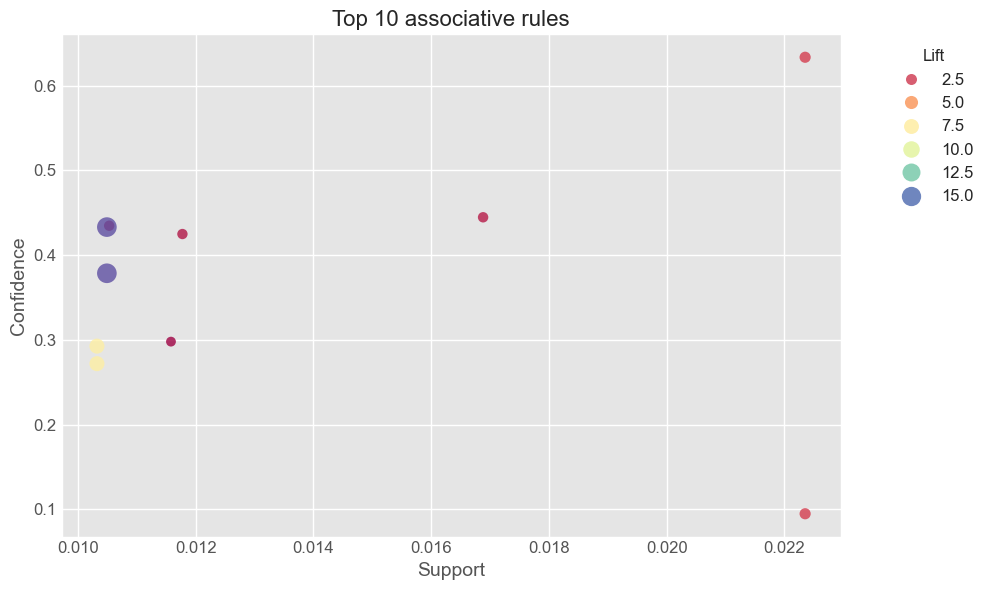

In [434]:
import matplotlib.pyplot as plt
import seaborn as sns

top_rules = rules.head(10)

sns.set_style("whitegrid")
plt.style.use('ggplot')
palette = sns.color_palette("Spectral", as_cmap=True)  # или 'viridis', 'coolwarm', 'plasma'

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=top_rules,
    x='support',
    y='confidence',
    hue='lift',
    size='lift',
    sizes=(50, 200),
    palette=palette,
    alpha=0.8,
    edgecolor='none'
)

plt.title("Top 10 associative rules", fontsize=16)
plt.xlabel("Support", fontsize=14)
plt.ylabel("Confidence", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

plt.tight_layout()
plt.show()

## Heat map of popular product among different number of clusters

### Heat map for 8 clusters

In [437]:
import pandas as pd

clusters_df = pd.read_excel('8_klasters_ne_summa.xlsx')

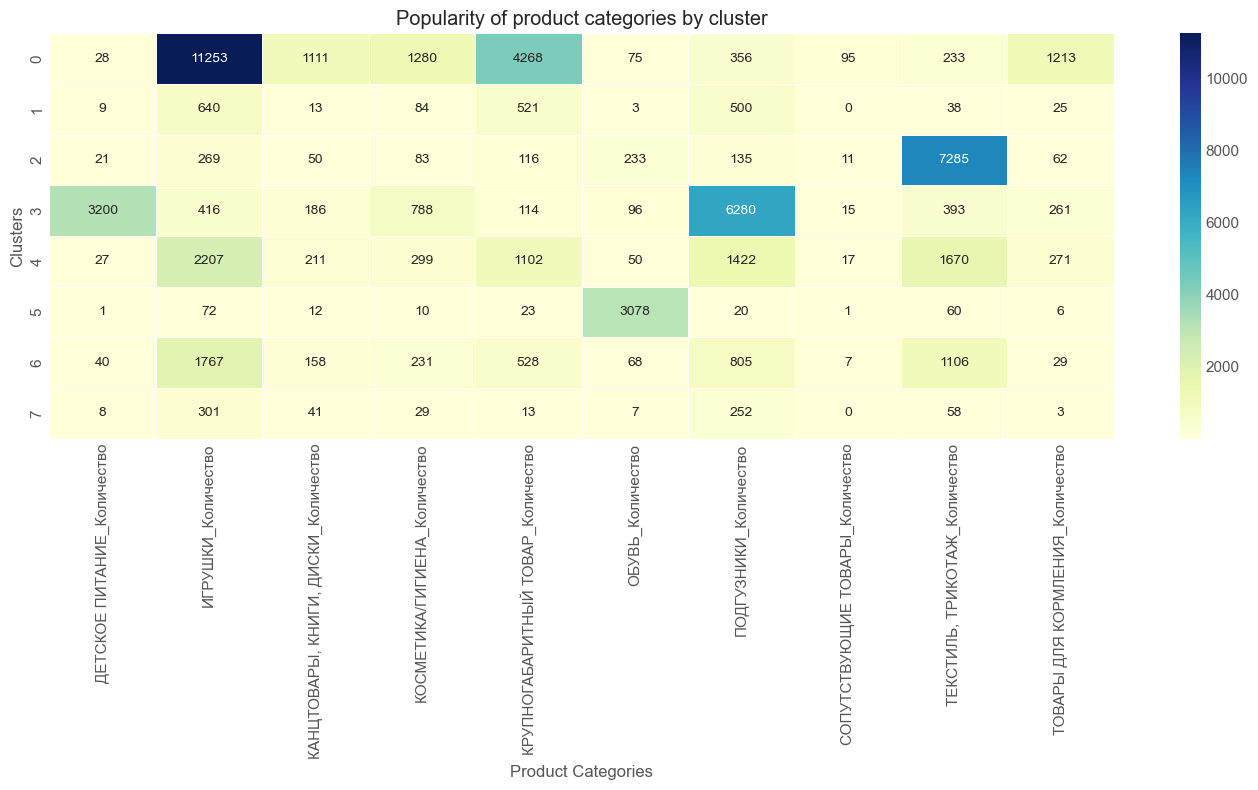

In [438]:
import seaborn as sns
import matplotlib.pyplot as plt


if 'Labels' in clusters_df.columns:
    item_columns = [col for col in clusters_df.columns if '_Количество' in col]
    
  
    cluster_item_matrix = clusters_df.groupby('Labels')[item_columns].sum()
    

    plt.figure(figsize=(14, 8))
    sns.heatmap(cluster_item_matrix, annot=True, fmt='.0f', cmap="YlGnBu", linewidths=.5)
    plt.title("Popularity of product categories by cluster")
    plt.xlabel("Product Categories")
    plt.ylabel("Clusters")
    plt.tight_layout()
    plt.show()


### Heat map for 10 clusters

In [440]:
import pandas as pd


clusters_df10 = pd.read_excel('10_klasters_ne_summa.xlsx')

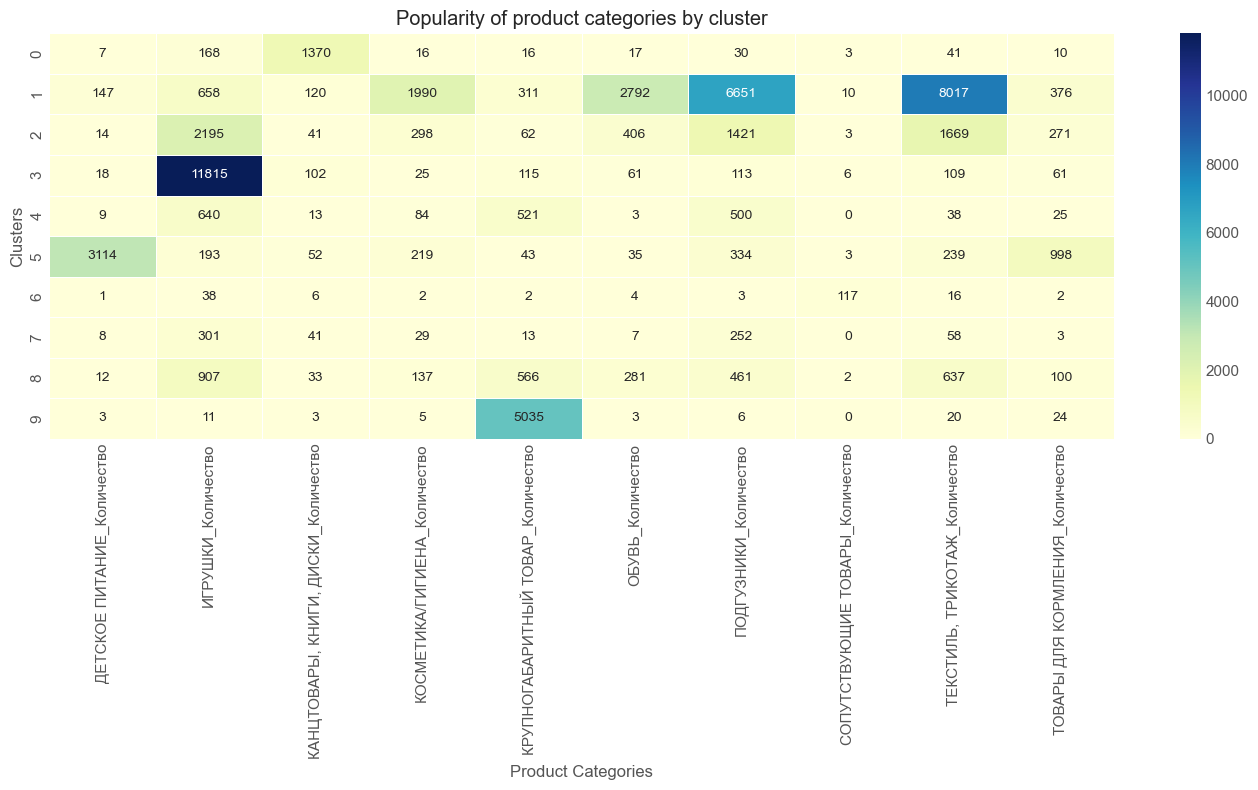

In [441]:
import seaborn as sns
import matplotlib.pyplot as plt


if 'Labels' in clusters_df10.columns:
    item_columns = [col for col in clusters_df10.columns if '_Количество' in col]
    cluster_item_matrix = clusters_df10.groupby('Labels')[item_columns].sum()
    
    plt.figure(figsize=(14, 8))
    sns.heatmap(cluster_item_matrix, annot=True, fmt='.0f', cmap="YlGnBu", linewidths=.5)
    plt.title("Popularity of product categories by cluster")
    plt.xlabel("Product Categories")
    plt.ylabel("Clusters")
    plt.tight_layout()
    plt.show()

### Heat map for 12 clusters

In [443]:
import pandas as pd

clusters_df12 = pd.read_excel('12_klasters_ne_summa.xlsx')

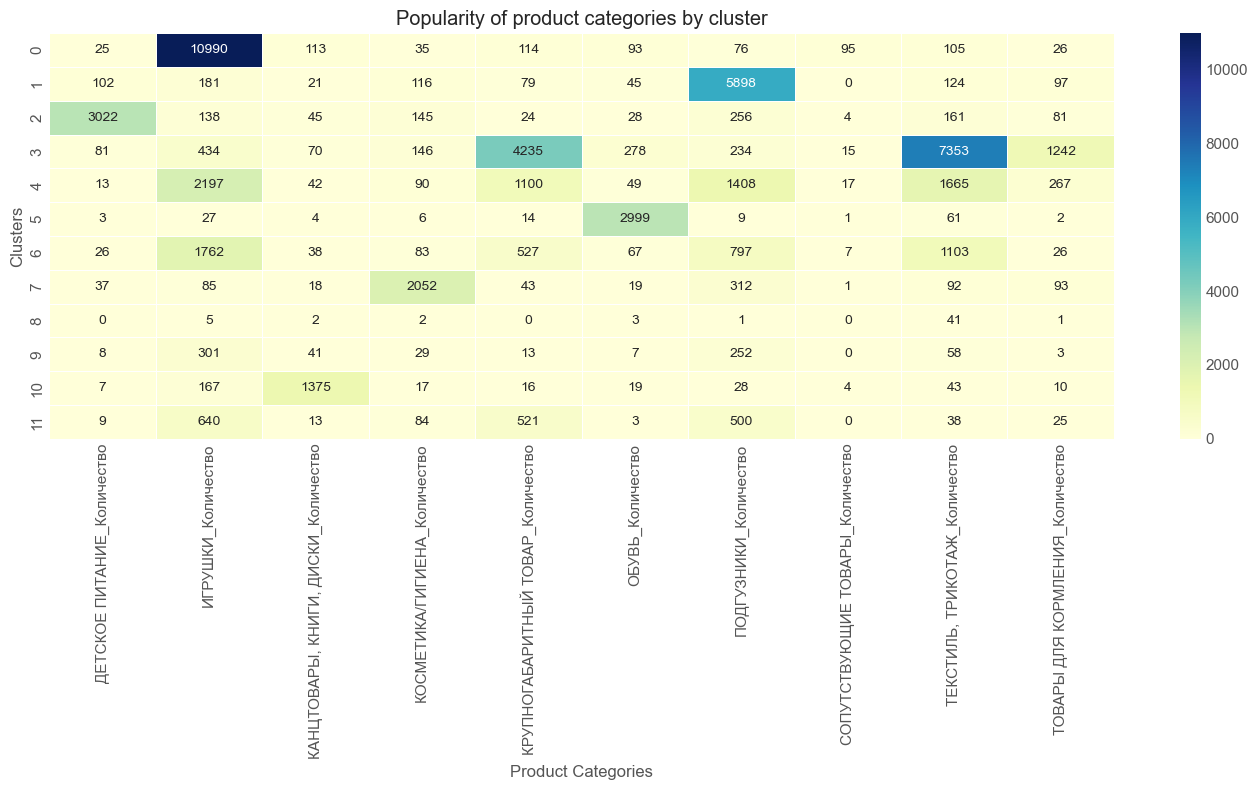

In [444]:
import seaborn as sns
import matplotlib.pyplot as plt

if 'Labels' in clusters_df12.columns:
    item_columns = [col for col in clusters_df12.columns if '_Количество' in col]

    cluster_item_matrix = clusters_df12.groupby('Labels')[item_columns].sum()
    
    plt.figure(figsize=(14, 8))
    sns.heatmap(cluster_item_matrix, annot=True, fmt='.0f', cmap="YlGnBu", linewidths=.5)
    plt.title("Popularity of product categories by cluster")
    plt.xlabel("Product Categories")
    plt.ylabel("Clusters")
    plt.tight_layout()
    plt.show()

## Network graph

In [446]:
from mlxtend.frequent_patterns import apriori, association_rules

In [447]:
rules_filtered = rules[(rules['confidence'] >= 0.1) & (rules['lift'] >= 0.5)]


edges = []
for _, row in rules_filtered.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    edges.append((antecedent, consequent, row['lift']))

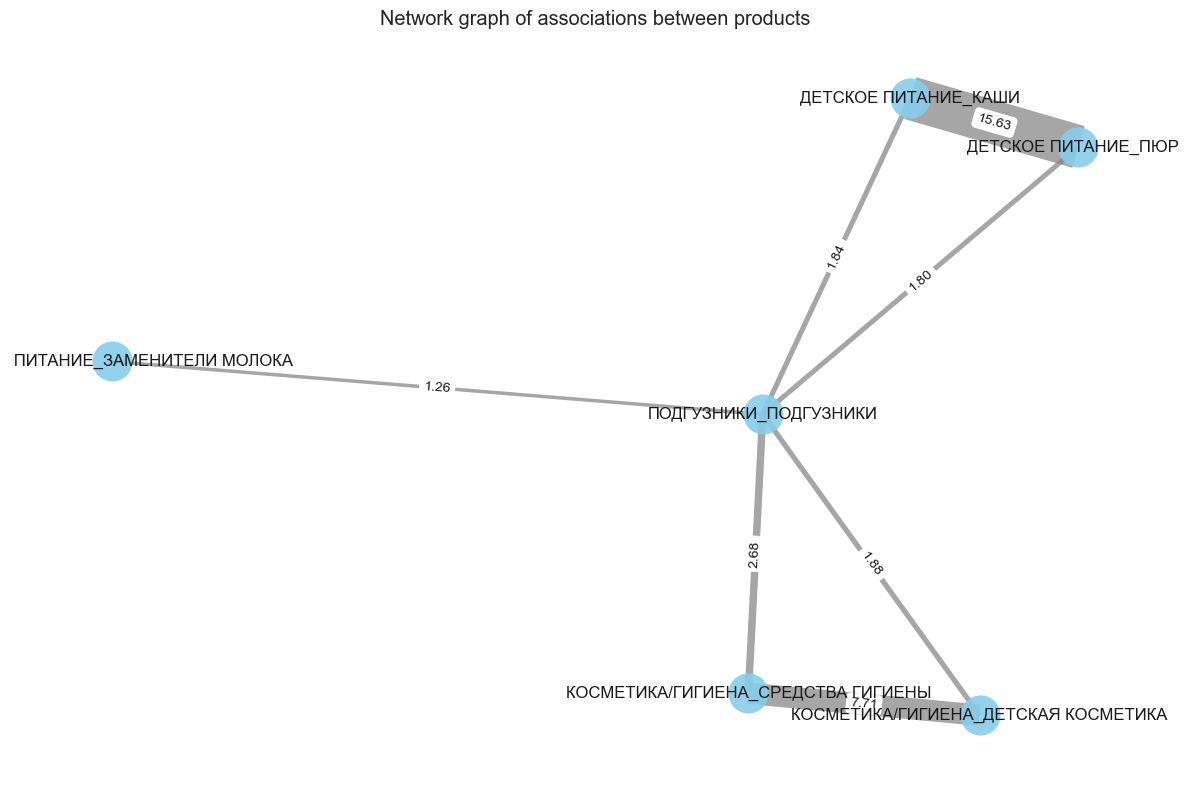

In [448]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.Graph()


for a, b, lift in edges:
    G.add_edge(a, b, weight=lift)




plt.figure(figsize=(12, 8))


pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [G[u][v]['weight'] * 2 for u, v in G.edges()]
nx.draw_networkx_nodes(G, pos, node_size=800, alpha=0.9, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.7, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')


edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Network graph of associations between products")
plt.axis('off')
plt.tight_layout()
plt.show()